# Librerias

In [ ]:
from itertools import combinations
from math import factorial
from os import scandir, getcwd

import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Primer carton

In [29]:
def gen_cartones(nfichas,tabs, metodo):# método = "aleatorio","unico","mismos"
    tablas = []
    checks =  []
    if metodo == "aleatorio":
        rng = np.random.default_rng()
        for i in range(tabs):
                tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
                
    elif metodo == "unico":
        tablas.append(np.random.default_rng(1).choice(range(1, nfichas), size=(6, 8), replace=False))
        rng = np.random.default_rng()
    
        for i in range(1,tabs):
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    elif metodo == "mismos":
        for i in range(tabs):
            rng = np.random.default_rng(i)
            tablas.append(rng.choice(range(1, nfichas), size=(6, 8), replace=False))
        
    else:
        print('método = "aleatorio","unico","mismos"')
        
      
    check = np.zeros((tabs,6,8))
    return (tablas, check)

In [30]:
tab1,xx = gen_cartones(80,1, "unico")
tab1

[array([[56, 71, 58, 78, 40, 76,  6, 12],
        [15, 66, 62, 26, 57, 74,  9, 37],
        [17, 55, 10, 27, 72, 68, 16, 47],
        [ 8, 46, 31, 42, 54, 29, 51, 38],
        [34, 13,  5, 20, 79, 22, 32, 61],
        [19, 36, 30, 44, 63,  2, 77, 28]])]

In [38]:
%%capture
tab2,xx =gen_cartones(80,20, "unico")
tab2

# Representacion gráfica de los datos
Antes de hablar de los resultados, esta primera ronda de datos, nos va a serivir de referencia para fijar el tamaño del conjunto de fichas, en realidad no representa mucho en el contexto estadistico, porque la probabilidad de ganar el carton de loteria va a depender por completo del número de personas que juegan.

Con los datos disponibles, vamos visualizar como influye en numero de fichas en forma como se llenan los cartones de una tabla, Como hicimos los calculos por parte vamos a unir toda la data disponible en un data frame.

In [2]:
# Solo una ves para concatenar todos los data frame

def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

def dfConcat(entrada,fileout):
    list_file = ls(entrada)
    df_loteria = pd.DataFrame(columns = ["numTablas", "numFichas", "distFichas", "fichasToWin","tabToWin"])
    
    for file in list_file:
        temp_df_loteria = pd.read_csv(entrada+file)
        df_loteria = pd.concat([df_loteria,temp_df_loteria],ignore_index=True)
    
    
    df_loteria.to_csv(entrada+fileout, header = True, index = False)

In [4]:
# Para invocar la funcion anterior y cont 
entrada = 'temp/Loto100/2tab_NU/'
fileout = 'df_loteria_100tabs_80fichas-1card_NU.csv'

dfConcat(entrada,fileout)

Lo anterio solo para concatenar la data simulada, solo se hace una ves

# Procesamiento de datos

Recordemos que tenemos tab1 que es el primer carton de cada simulacion. Esto con el fin de representar una persona que juega el mismo caton miles de veces para contar cuantas veces esa tabla gana una loteria.

Abajo vamos a importar los datos de la simulación. Tenemos 1000 juegos donde fijamos el numero de fichas a 80 variamos en numero de tablas de 5 a 30 variando la cantidad de 5 en 5 y cambiamos la cantidad de cartones llenos que necesitamos para ganar.

Configuramos todas las partidas para que el primer carton fuera el mismo para todas las partidas. Con esto queremos representar cuantas veces ganamos tales sorteos.


In [3]:
# Open data
#df_loteria1 = pd.read_csv("temp/df_loteria_ntaps&fichas-1card.csv")
#df_loteria2 = pd.read_csv("temp/df_loteria_ntaps&fichas-2card.csv")
#df_loteria3 = pd.read_csv("temp/df_loteria_ntaps&fichas-3card.csv")

df_loteria1 = pd.read_csv("data/df_loteria_ntaps&fichas-1card.csv")# Varios cartones 1carton llen
df_loteria2 = pd.read_csv("data/df_loteria_ntaps&fichas-2card.csv")# Varios cartones 2carton llen
df_loteria3 = pd.read_csv("data/df_loteria_ntaps&fichas-3card.csv")# Varios cartones 3carton llen
df_loteria = pd.read_csv("data/df_loteria_ntaps&fichas.csv")# Cambiando num Fichas

## 100 cartones 80 fichas 1,2 y 3 cartones llenos para ganar

df_100_80_1tab = pd.read_csv("data/df_loteria_100taps_80fichas-1card.csv")# 1 tab lleno
df_100_80_2tab = pd.read_csv("data/df_loteria_100taps_80fichas-2card.csv")# 2 tab lleno
df_100_80_3tab = pd.read_csv("data/df_loteria_100taps_80fichas-3card.csv")# 3 tab lleno

#display(df_loteria.T,df_loteria1.T,df_loteria2.T,df_loteria3.T)

In [4]:
#display(df_loteria1.T,df_loteria2.T,df_loteria3.T)
display(df_100_80_1tab.T,df_100_80_2tab.T,df_100_80_3tab.T)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
numTablas,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
numFichas,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
distFichas,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
fichasToWin,42,39,34,31,36,35,29,40,35,44,...,37,36,34,40,36,40,40,45,29,33
tabToWin,"[array([22, 17, 33, 37, 54, 49, 11, 48])]","[array([62, 21, 68, 71, 19, 66, 57, 51])]","[array([79, 10, 60, 20, 66, 63, 51, 47])]","[array([64, 29, 58, 76, 46, 63, 48, 26])]","[array([48, 44, 5, 63, 65, 27, 70, 35])]","[array([10, 34, 2, 61, 47, 63, 28, 64])]","[array([ 1, 24, 62, 71, 21, 26, 59, 36])]","[array([48, 51, 28, 14, 74, 64, 47, 66])]","[array([32, 55, 24, 25, 66, 18, 77, 41])]","[array([ 4, 53, 39, 74, 30, 64, 42, 66])]",...,"[array([66, 13, 67, 57, 53, 35, 76, 34])]","[array([24, 56, 15, 73, 40, 65, 43, 7])]","[array([49, 48, 62, 53, 73, 51, 14, 74])]","[array([53, 32, 25, 63, 27, 51, 29, 73])]","[array([56, 14, 19, 18, 63, 65, 61, 32])]","[array([78, 42, 50, 20, 34, 21, 6, 1])]","[array([68, 11, 72, 4, 17, 57, 52, 50])]","[array([ 1, 72, 68, 51, 34, 58, 9, 27])]","[array([25, 42, 76, 52, 64, 23, 15, 54])]","[array([30, 74, 6, 76, 62, 32, 68, 49])]"


,0,1,2,3,4,5,6,7,8,9,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
numTablas,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
numFichas,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
distFichas,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
fichasToWin,54,56,55,47,52,43,51,46,45,56,...,55,50,52,53,51,57,49,54,53,55
tabToWin,"[array([28, 2, 23, 6, 30, 45, 3, 48]), arra...","[array([ 1, 15, 50, 3, 36, 67, 43, 55]), arra...","[array([ 7, 33, 49, 31, 48, 79, 38, 17]), arra...","[array([25, 26, 15, 63, 17, 20, 69, 33]), arra...","[array([79, 37, 27, 25, 41, 59, 50, 5]), arra...","[array([37, 79, 1, 39, 8, 73, 44, 68]), arra...","[array([24, 73, 77, 55, 14, 1, 58, 36]), arra...","[array([28, 69, 32, 72, 22, 6, 5, 75]), arra...","[array([34, 21, 35, 9, 61, 36, 75, 53]), arra...","[array([ 1, 15, 50, 3, 36, 67, 43, 55]), arra...",...,"[array([41, 8, 72, 36, 53, 25, 23, 42]), arra...","[array([60, 21, 62, 18, 52, 30, 33, 39]), arra...","[array([ 4, 1, 50, 38, 79, 7, 78, 30]), arra...","[array([ 9, 19, 66, 29, 56, 75, 34, 45]), arra...","[array([12, 10, 65, 33, 42, 13, 49, 66]), arra...","[array([77, 48, 58, 78, 32, 75, 23, 4]), arra...","[array([ 5, 43, 62, 16, 45, 63, 25, 52]), arra...","[array([35, 63, 3, 41, 12, 76, 20, 78]), arra...","[array([ 1, 4, 11, 16, 69, 73, 77, 35]), arra...","[array([58, 34, 31, 60, 40, 66, 47, 62]), arra..."


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
numTablas,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
numFichas,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
distFichas,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
fichasToWin,62,63,63,59,62,63,58,56,61,60,...,60,56,61,61,62,58,61,60,58,62
tabToWin,"[array([ 6, 66, 78, 38, 31, 48, 50, 72]), arra...","[array([42, 30, 14, 6, 3, 16, 20, 76]), arra...","[array([ 5, 43, 62, 16, 45, 63, 25, 52]), arra...","[array([76, 48, 66, 4, 43, 57, 61, 78]), arra...","[array([78, 16, 36, 73, 74, 7, 31, 62]), arra...","[array([42, 45, 75, 22, 55, 76, 8, 4]), arra...","[array([36, 43, 32, 14, 74, 50, 38, 55]), arra...","[array([50, 23, 36, 67, 40, 7, 28, 65]), arra...","[array([17, 53, 44, 15, 45, 55, 3, 14]), arra...","[array([56, 51, 59, 65, 10, 49, 60, 25]), arra...",...,"[array([62, 63, 65, 18, 8, 73, 34, 22]), arra...","[array([64, 20, 21, 12, 6, 2, 47, 54]), arra...","[array([25, 26, 15, 63, 17, 20, 69, 33]), arra...","[array([48, 37, 10, 9, 60, 4, 3, 44]), arra...","[array([62, 63, 65, 18, 8, 73, 34, 22]), arra...","[array([44, 43, 2, 26, 40, 63, 9, 14]), arra...","[array([43, 59, 16, 32, 3, 22, 19, 53]), arra...","[array([75, 13, 10, 18, 71, 79, 41, 47]), arra...","[array([65, 75, 46, 6, 59, 57, 42, 61]), arra...","[array([35, 21, 50, 52, 47, 4, 64, 56]), arra..."


Vemos que en la columna `tabToWin` tenemos los cartones en formato str, vamos a cambiarlo para convertirlo despues en una cariable categorica. 

Definimos una funcion que separa los numeros contenidos en el estring y luego los ordena un arreglo. Por ultimo anexamos los datos a una copia del DataFrame y anexamos una columna que contega el numero de cartones necesarios para ganar

In [5]:
def numTabs(tabs): # Contador de cartones
    tab2win=[]
    for tab in tabs:
        tab2win.append(len(tab))
    return tab2win

def reorder_tabs(dataFrame):           # Convierte los str de tabToWin en un arreglo 
    nDF = dataFrame["tabToWin"].copy() # los cuenta y anexa toda la informacion.
    df = dataFrame.copy()
    df_out = []
    
    for tab in nDF:
        array = []

        int_b = re.findall("(\d+)",tab)

        for i in range(int(len(int_b)/8)):
            temp_array = []

            for i in range(i*8,i*8+8):
                temp_array.append(int(int_b[i]))

            array.append(temp_array)
        
        df_out.append(array)
    
    tab2win = numTabs(df_out)
    
    df["tab2win"] = pd.Series(tab2win)
    df["tabs"]=pd.Series(df_out)
    df.pop("tabToWin")
      
    return df


# Invocamos la funcion

#df = reorder_tabs(df_loteria1)

#df

In [ ]:
# Reordenos los datos para separar los tabs en str completo

# Priemera tanda de datos
df_loto1  =reorder_tabs( df_loteria1 ) 
df_loto2  =reorder_tabs( df_loteria2 )
df_loto3  =reorder_tabs( df_loteria3 )
df_loto   =reorder_tabs( df_loteria  )

# Segunda tanda de datos
df_1o80_lt1 = reorder_tabs(df_100_80_1tab[0:1000])
df_1o80_lt2 = reorder_tabs(df_100_80_2tab[0:1000])
df_1o80_lt3 = reorder_tabs(df_100_80_3tab[0:1000])



In [ ]:
#display(df_loto1.T,df_loto2.T,df_loto3.T,df_loto.T)
display(df_1o80_lt1.T,df_1o80_lt2.T,df_1o80_lt3.T)

In [ ]:
df_loto123 = pd.concat([df_loto1,df_loto2,df_loto3])

df_1o80_123 = pd.concat([df_1o80_lt1,df_1o80_lt2,df_1o80_lt3],ignore_index=True)

display(df_loto123.T,df_1o80_123.T)

In [9]:
df_1o80_123

,numTablas,numFichas,distFichas,fichasToWin,tab2win,tabs
0,100,80,uniform,42,1,"[[22, 17, 33, 37, 54, 49, 11, 48]]"
1,100,80,uniform,39,1,"[[62, 21, 68, 71, 19, 66, 57, 51]]"
2,100,80,uniform,34,1,"[[79, 10, 60, 20, 66, 63, 51, 47]]"
3,100,80,uniform,31,1,"[[64, 29, 58, 76, 46, 63, 48, 26]]"
4,100,80,uniform,36,1,"[[48, 44, 5, 63, 65, 27, 70, 35]]"
...,...,...,...,...,...,...
2995,100,80,uniform,58,3,"[[44, 43, 2, 26, 40, 63, 9, 14], [60, 21, 62, ..."
2996,100,80,uniform,61,3,"[[43, 59, 16, 32, 3, 22, 19, 53], [39, 33, 29,..."
2997,100,80,uniform,60,3,"[[75, 13, 10, 18, 71, 79, 41, 47], [25, 58, 36..."
2998,100,80,uniform,58,3,"[[65, 75, 46, 6, 59, 57, 42, 61], [54, 11, 40,..."


<AxesSubplot: xlabel='fichasToWin', ylabel='Count'>

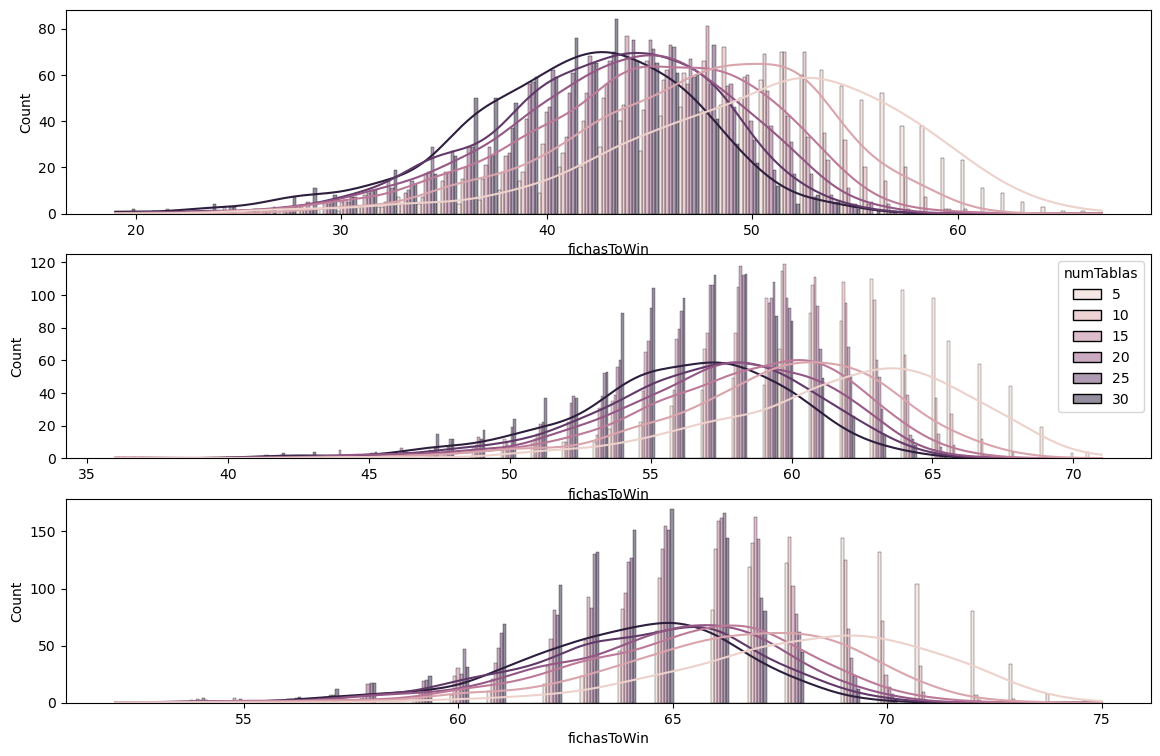

In [11]:
f, axs = plt.subplots(3, 1, figsize=(14, 9))

sns.histplot(data=df_loto1, x="fichasToWin",  hue="numTablas" ,multiple="dodge", ax=axs[0],legend=False,kde=True)
sns.histplot(data=df_loto2, x="fichasToWin", hue="numTablas" ,multiple="dodge", ax=axs[1],kde=True)
sns.histplot(data=df_loto3, x="fichasToWin",  hue="numTablas" ,multiple="dodge", ax=axs[2],legend=False,kde=True)

In [10]:
def xticks_hist(data,bins_): # Calcula las marcas del histograma
    xticks = []
    a=np.histogram(data,bins=bins_)
    
    for i in range(len(a[1])-1):
        h =np.rint(((a[1][i+1]-a[1][i])/2)+a[1][i])
        xticks.append(h )
    return xticks

#xticks_hist(df_lote_20_30["fichasToWin"],20)

def hist_loto_numtab_kde(data,bins,estilo,etiquetas): # Genera el histograma de las fichas2win
    
    size =35
    tsize = 24
    paleta =  ['#C0392B', '#9B59B6', '#2980B9', '#1ABC9C', '#D35400', '#B7950B','#34495E']
    
    fig, axs = plt.subplots(figsize=(30, 10), dpi=100)
    
    sns.histplot(data=data , x="fichasToWin", hue="numTablas",kde=True
                 ,bins=bins,shrink=0.8,multiple=estilo,palette=paleta,ax=axs)

    axs.set_title("Fichas que llenan un carton con varias tablas "
                  +'['+str(data["tab2win"][0])+' carton(es) llenos]', fontsize = size)
    axs.set_xlabel("Fichas para carton lleno", fontsize = size)
    axs.set_xticks(xticks_hist(data["fichasToWin"],bins), fontsize = size-size*.45)
    axs.set_ylabel("Veces que gana", fontsize = size)
    axs.legend( title='Numero \nde tablas', labels=etiquetas, fontsize = size-size*.3)#,'20','25','30'
    axs.tick_params(axis='x', labelsize=tsize)
    axs.tick_params(axis='y', labelsize=tsize)
    
    plt.setp(axs.get_legend().get_title(), fontsize=size -size*.2)
    
    fig.savefig('media/hist_loto_numtab_kde'+str(data["tab2win"][0])+'_d_'+ str(etiquetas[-1])
                +'_a_'+str(etiquetas[0])+'_.png')
    return fig

In [11]:
%%capture
df_loto1_all = pd.concat([df_1o80_lt1[0:1000],df_loto1],ignore_index=True)
df_loto2_all = pd.concat([df_1o80_lt2[0:1000],df_loto2],ignore_index=True)
df_loto3_all = pd.concat([df_1o80_lt3[0:1000],df_loto3],ignore_index=True)

kde1=hist_loto_numtab_kde(df_loto1_all,15,"dodge",['100','30','25','20','15','10','5'])
kde2=hist_loto_numtab_kde(df_loto2_all,15,"dodge",['100','30','25','20','15','10','5'])
kde3=hist_loto_numtab_kde(df_loto3_all,15,"dodge",['100','30','25','20','15','10','5'])

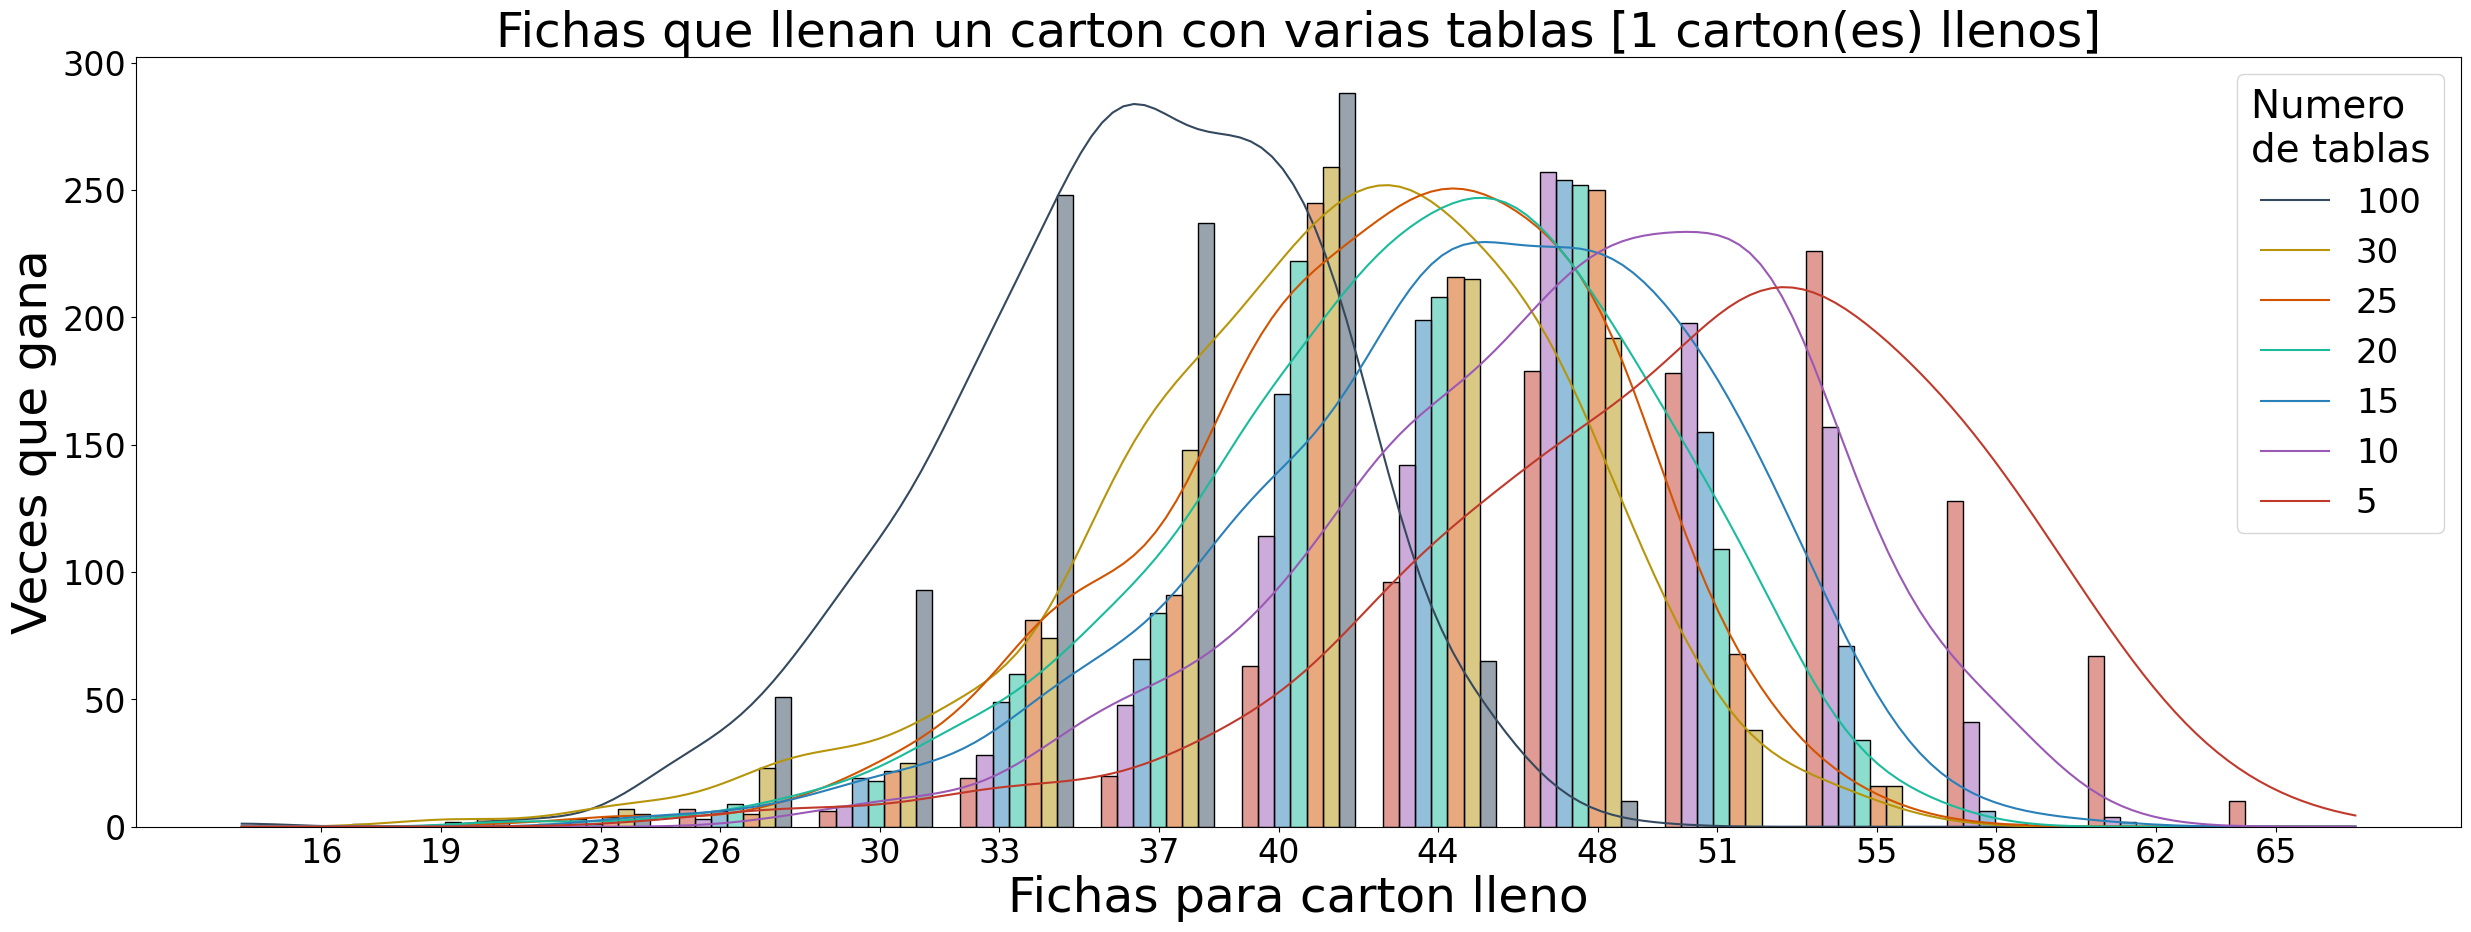

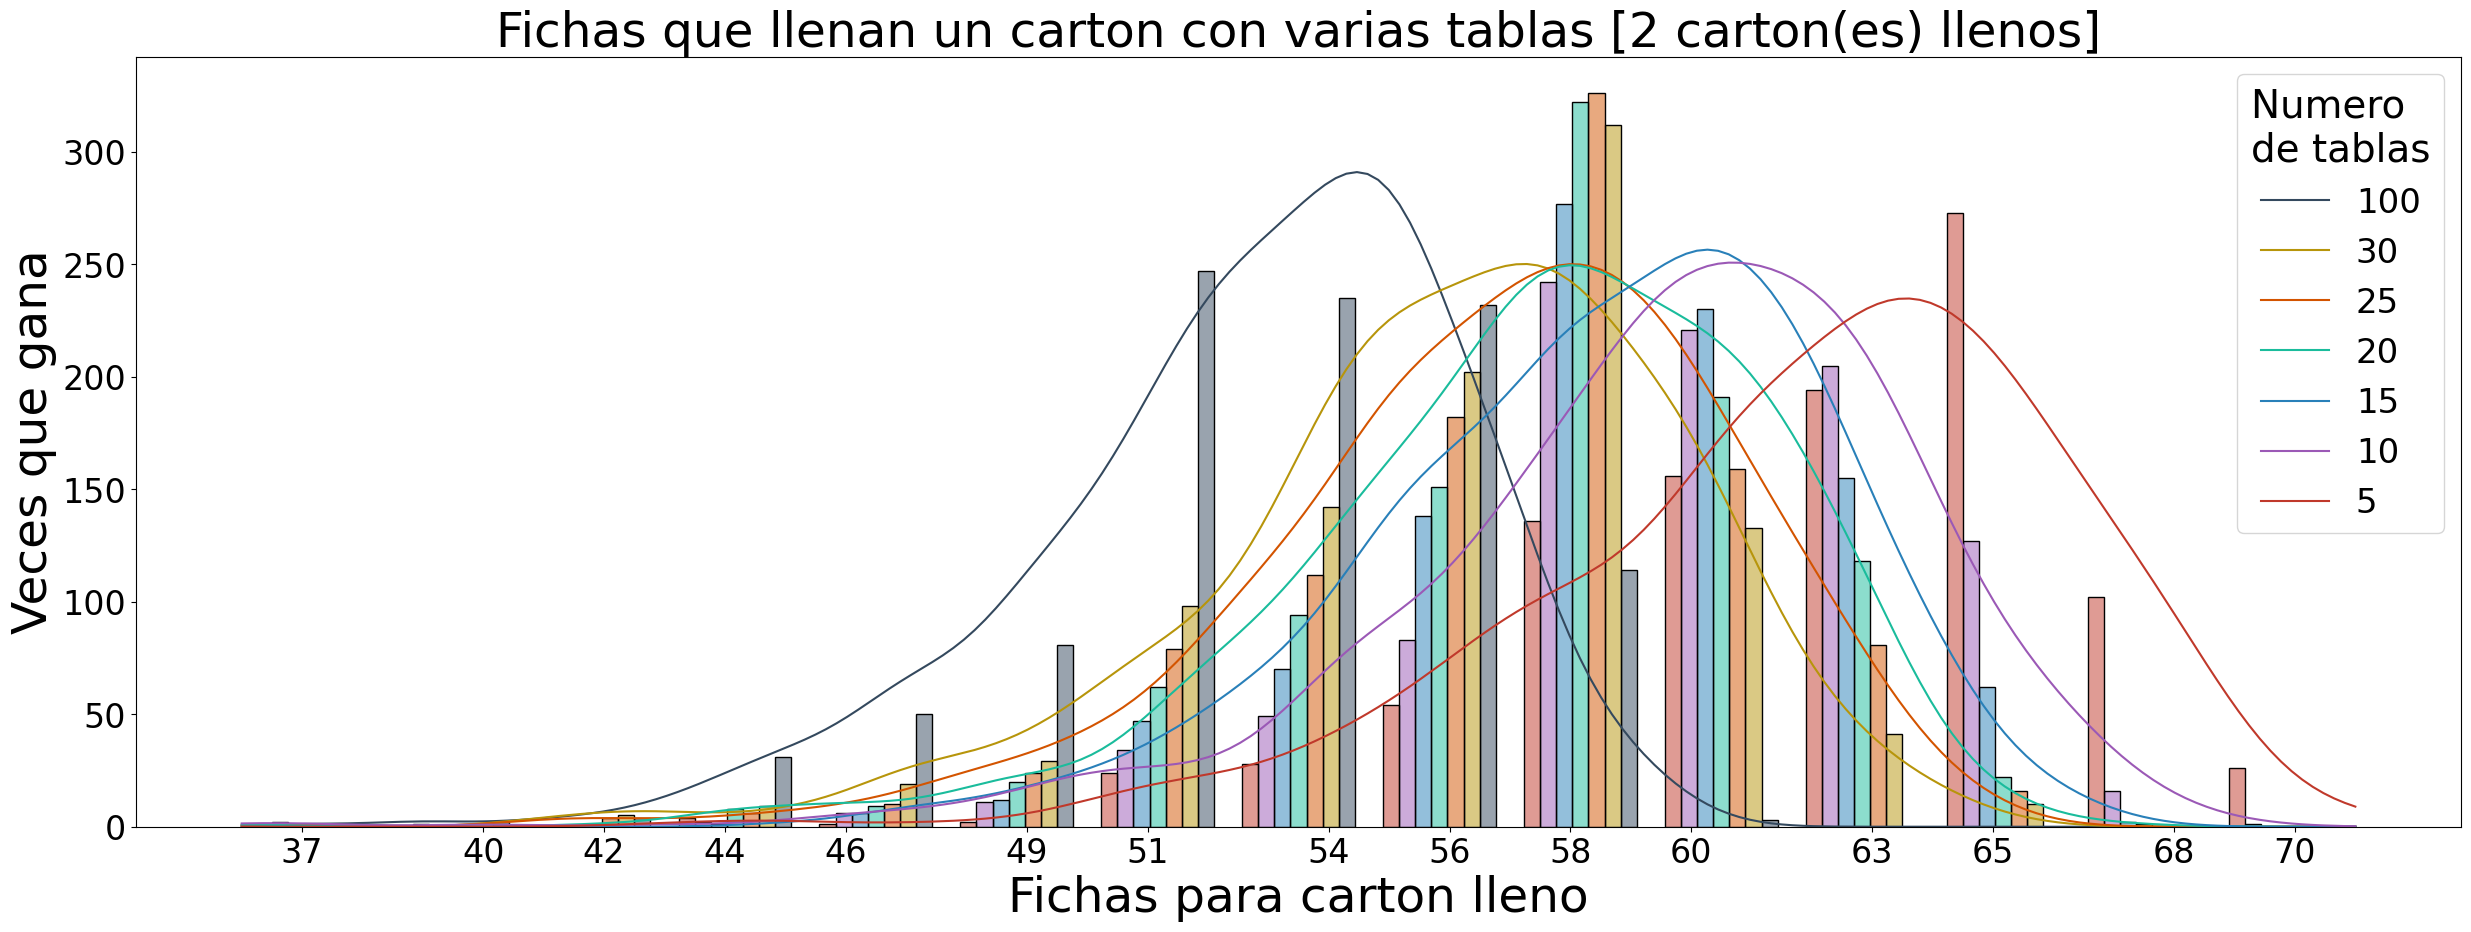

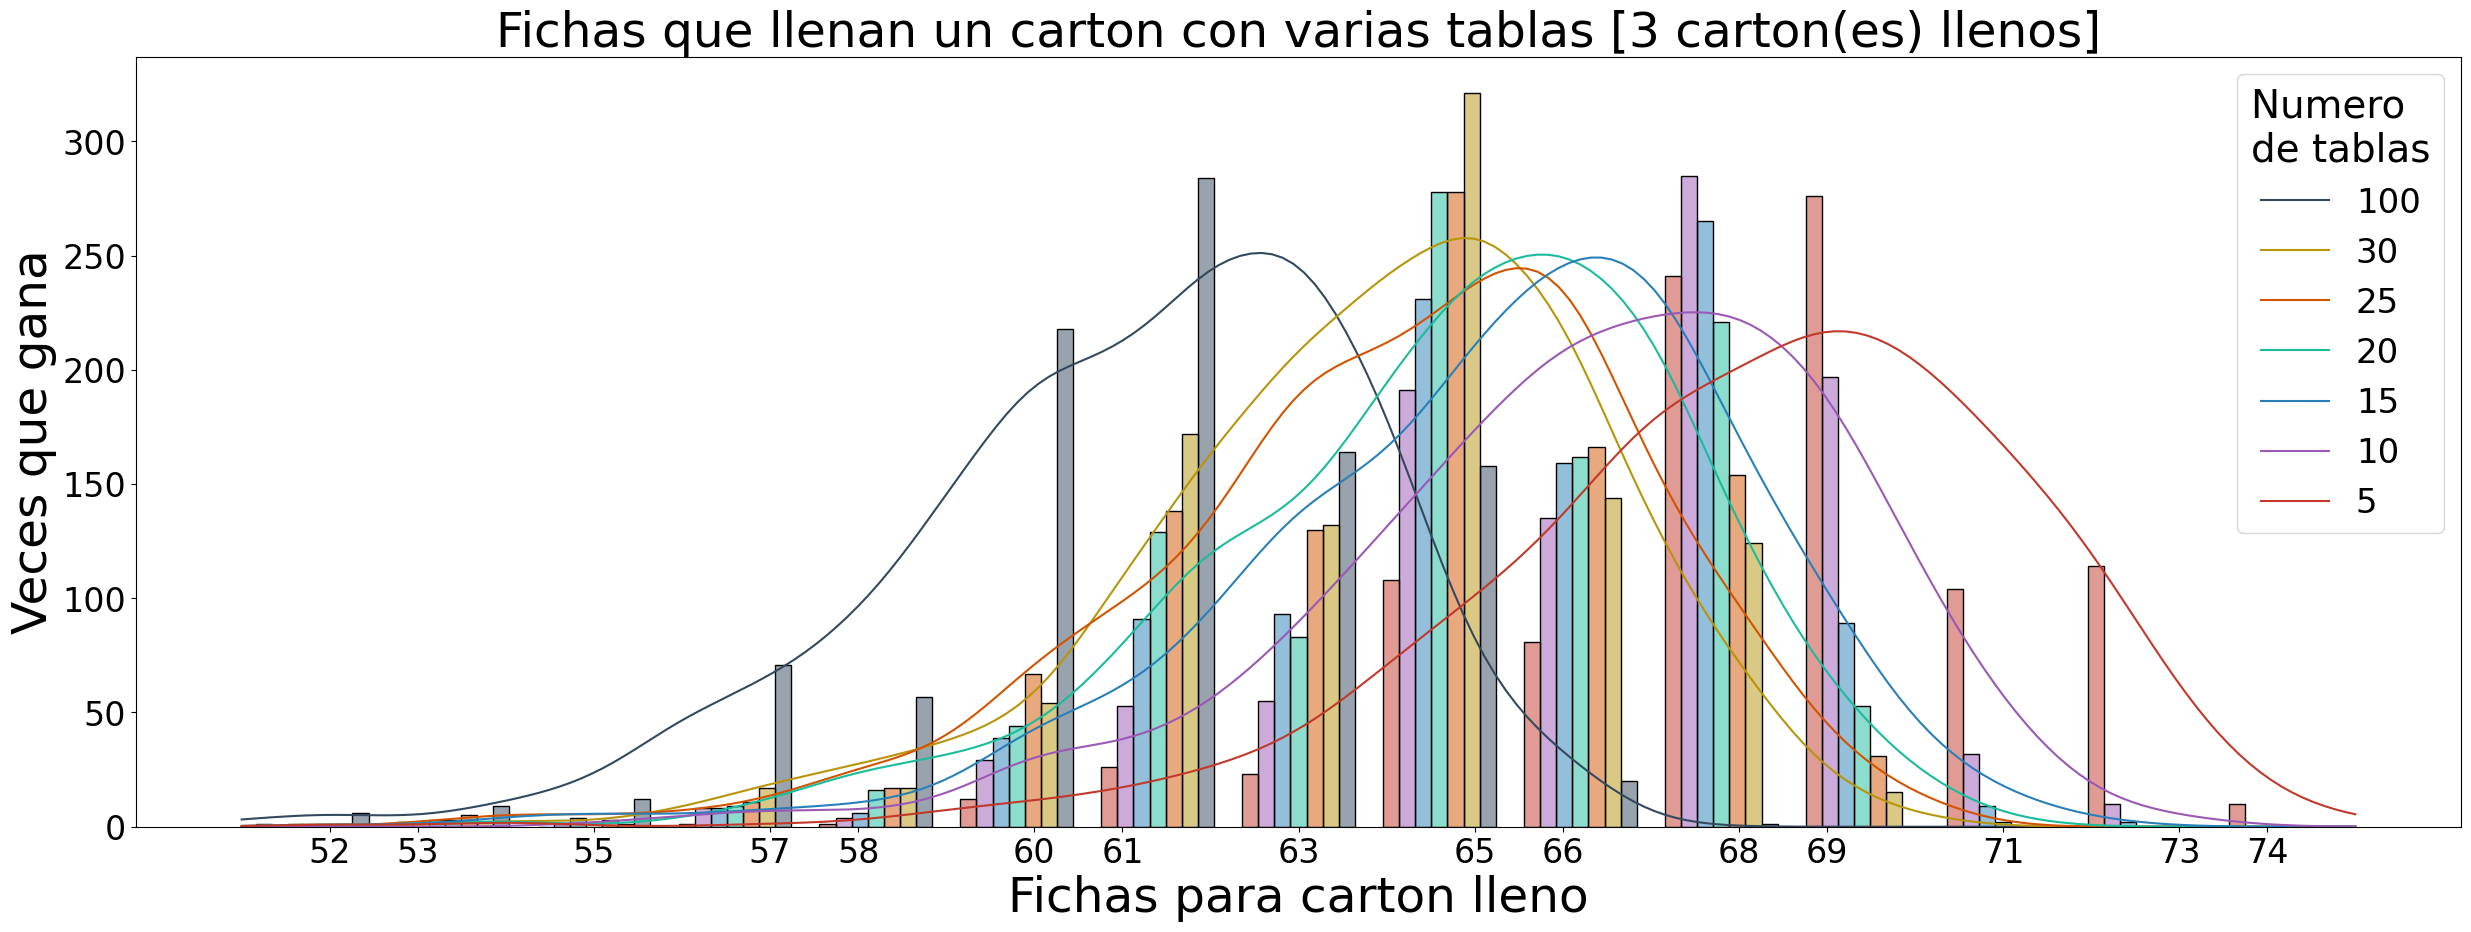

In [103]:
display(kde1,kde2,kde3)

In [82]:
#solo mil datos

all_data["tab2win"][0]

1

In [81]:
all_data = pd.concat([df_1o80_lt1,df_loto1],ignore_index=True)
all_data

,numTablas,numFichas,distFichas,fichasToWin,tab2win,tabs
0,100,80,uniform,42,1,"[[22, 17, 33, 37, 54, 49, 11, 48]]"
1,100,80,uniform,39,1,"[[62, 21, 68, 71, 19, 66, 57, 51]]"
2,100,80,uniform,34,1,"[[79, 10, 60, 20, 66, 63, 51, 47]]"
3,100,80,uniform,31,1,"[[64, 29, 58, 76, 46, 63, 48, 26]]"
4,100,80,uniform,36,1,"[[48, 44, 5, 63, 65, 27, 70, 35]]"
...,...,...,...,...,...,...
6995,5,80,uniform,55,1,"[[20, 73, 8, 63, 71, 62, 67, 5]]"
6996,5,80,uniform,45,1,"[[15, 66, 62, 26, 57, 74, 9, 37]]"
6997,5,80,uniform,51,1,"[[49, 59, 64, 26, 61, 44, 8, 56]]"
6998,5,80,uniform,59,1,"[[17, 55, 10, 27, 72, 68, 16, 47]]"


<AxesSubplot: xlabel='fichasToWin', ylabel='Count'>

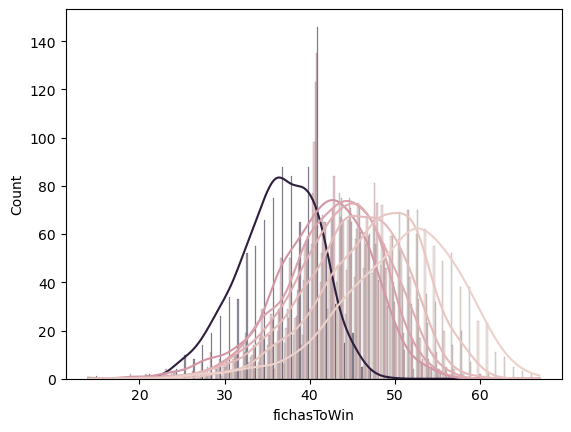

In [67]:
#kde11=hist_loto_numtab_kde(all_data,15,"dodge",['100','30','25','20','15','10','5'])


sns.histplot(data=all_data, x="fichasToWin",  hue="numTablas" ,multiple="dodge", legend=False,kde=True)

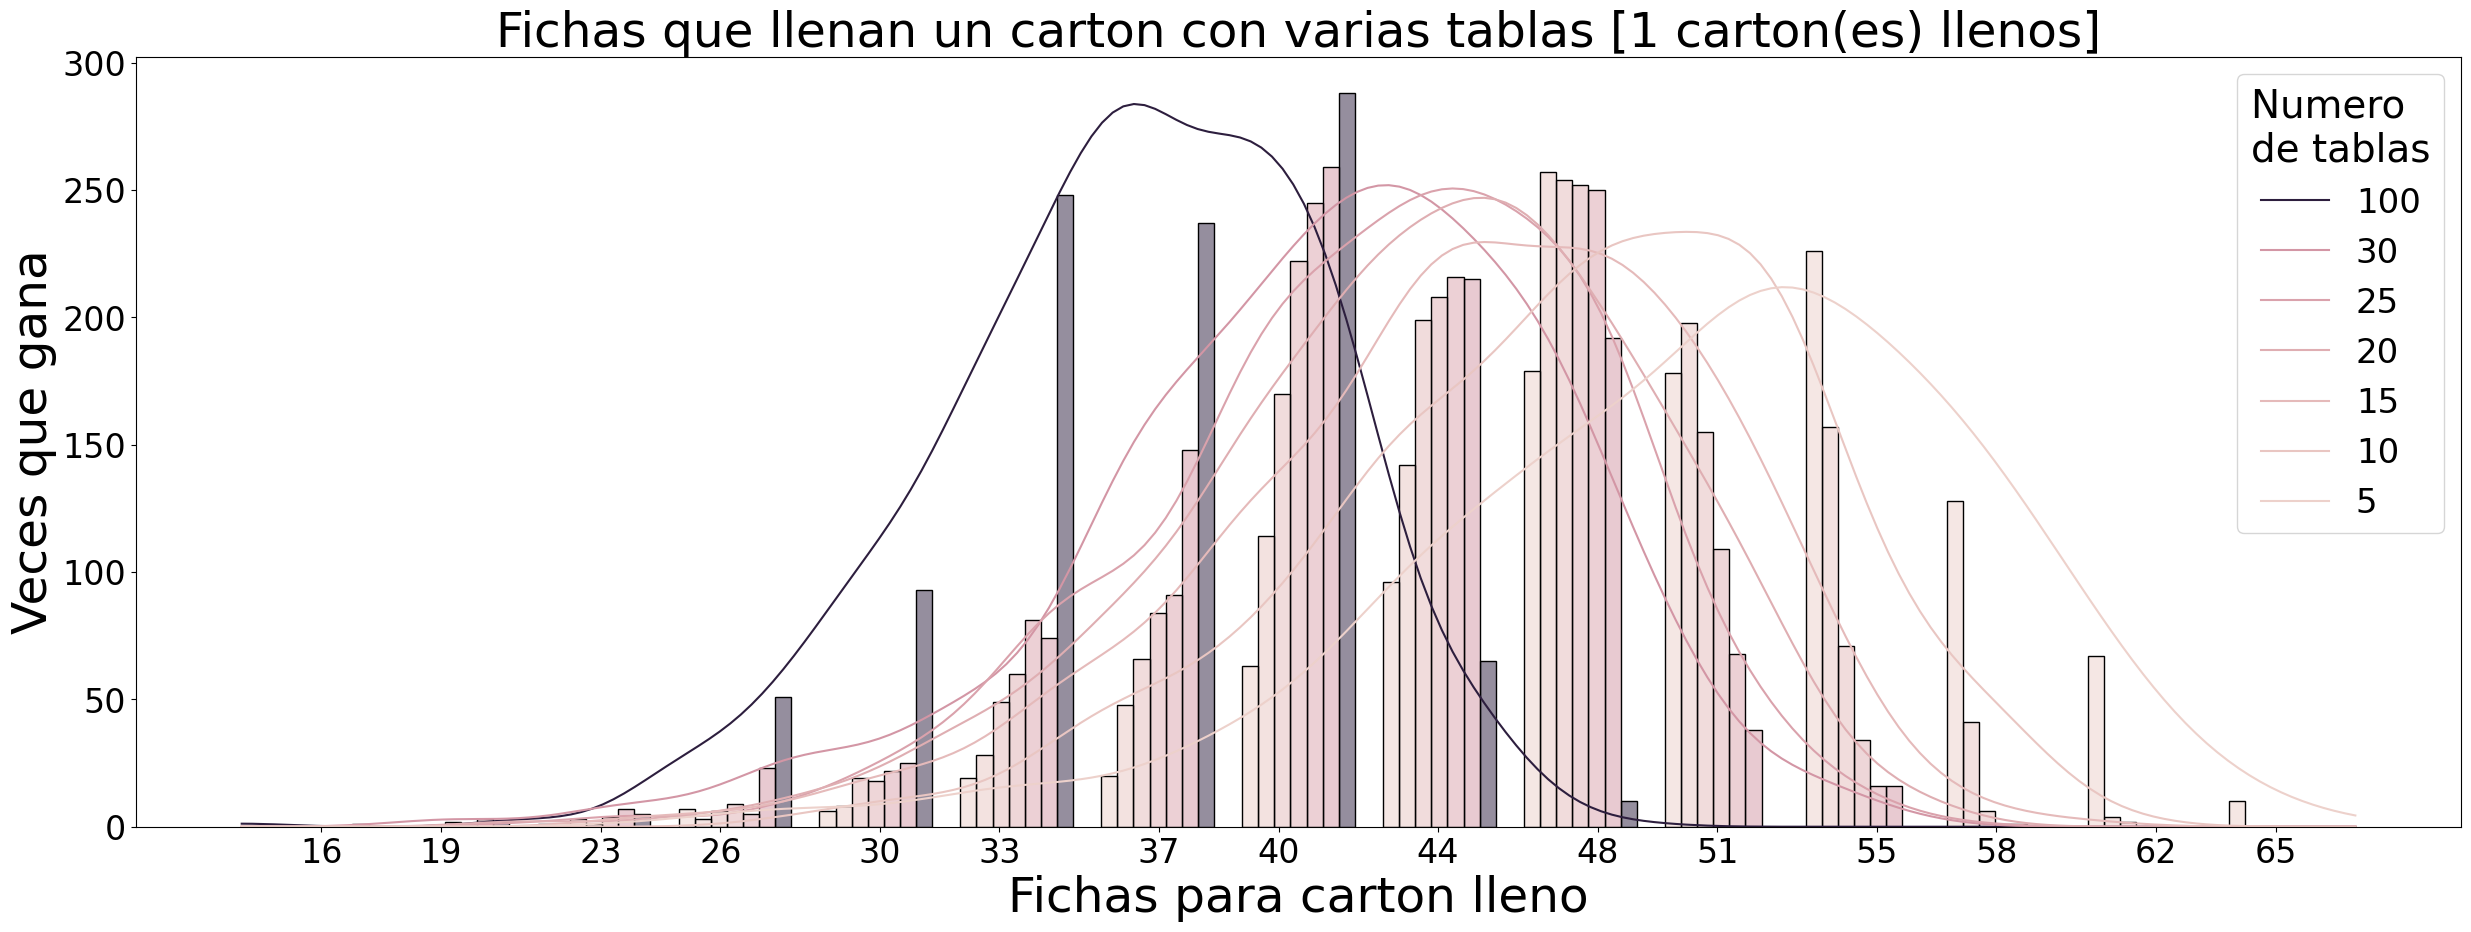

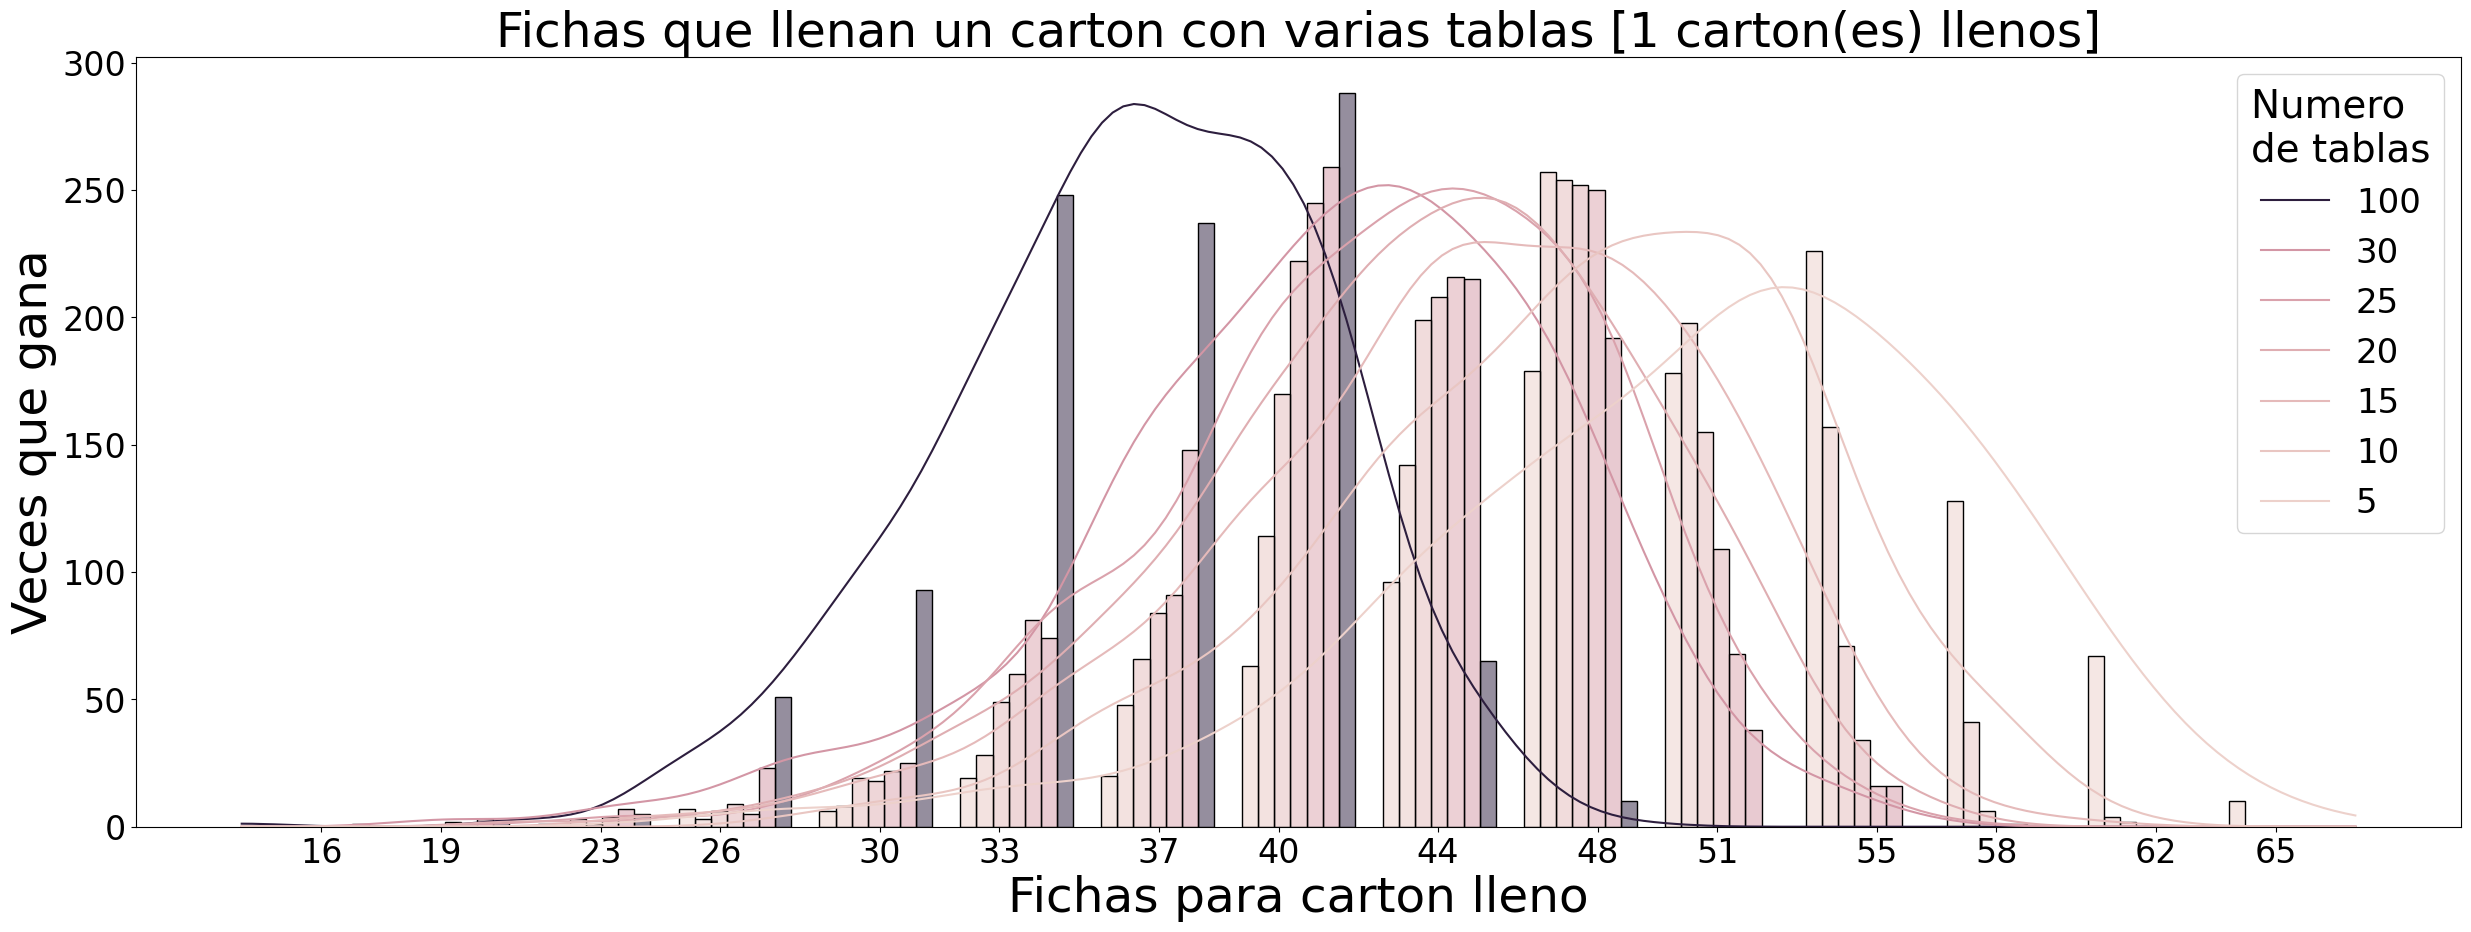

In [83]:
hist_loto_numtab_kde(all_data,15,"dodge",['100','30','25','20','15','10','5'])


In [15]:
df1 = df_loto1.copy()
df2 = df_loto2.copy()
df3 = df_loto3.copy()

df1_nfichas = df1["fichasToWin"]
df1_norm = (df1_nfichas-df1_nfichas.mean())/(df1_nfichas.max()-df1_nfichas.min())
df1["fichasToWinNorm"] =  df1_norm

df2_nfichas = df2["fichasToWin"]
df2_norm = (df2_nfichas-df2_nfichas.mean())/(df2_nfichas.max()-df2_nfichas.min())
df2["fichasToWinNorm"] =  df2_norm

df3_nfichas = df3["fichasToWin"]
df3_norm = (df3_nfichas-df3_nfichas.mean())/(df3_nfichas.max()-df3_nfichas.min())
df3["fichasToWinNorm"] =  df3_norm

In [34]:
%%capture
typo = "dodge"
elemt= "step"
f1, axs = plt.subplots(1, 2, figsize=(6, 3))

sns.histplot(data=df1, x="fichasToWinNorm",  hue="numTablas" ,element= elemt ,multiple=typo,ax=axs[0], kde=True)
sns.histplot(data=df1, x="fichasToWinNorm",  hue="numTablas" ,multiple=typo,ax=axs[1], kde=True,legend = False)

f2, axs = plt.subplots(1, 2, figsize=(6, 3))

sns.histplot(data=df2, x="fichasToWinNorm",  hue="numTablas" ,element= elemt,multiple=typo,ax=axs[0], kde=True)
sns.histplot(data=df2, x="fichasToWinNorm",  hue="numTablas" ,multiple=typo,ax=axs[1], kde=True,legend = False)

f3, axs1 = plt.subplots(1, 2, figsize=(6, 3))

sns.histplot(data=df3, x="fichasToWinNorm",  hue="numTablas" ,element= elemt,multiple=typo,ax=axs1[0], kde=True)
sns.histplot(data=df3, x="fichasToWinNorm",  hue="numTablas" ,multiple=typo,ax=axs1[1], kde=True,legend = False)

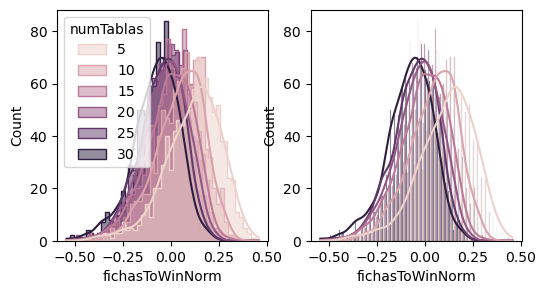

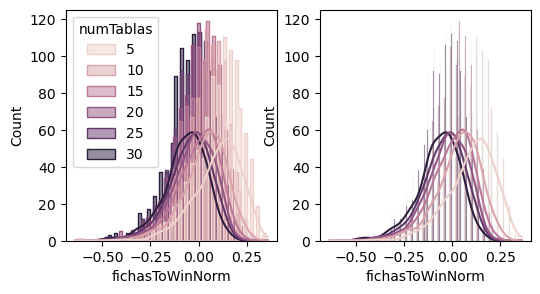

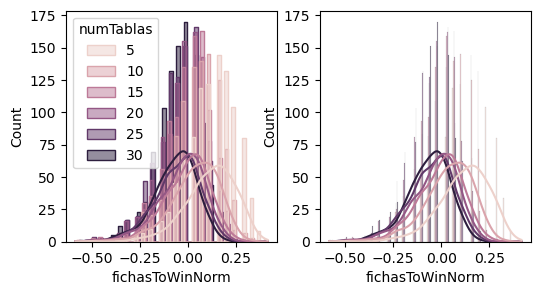

In [35]:
display(f1,f2,f3)

In [ ]:
%%capture

In [130]:
for i in range(6):
    print(i,(5+5*i))

0 5
1 10
2 15
3 20
4 25
5 30


In [156]:
TW1NTn.append(df_loto123["fichasToWin"][(df_loto123["numTablas"]==(5)) &(df_loto123["tab2win"]==1) ].tolist())
TW1NTn.append(df_loto123["fichasToWin"][(df_loto123["numTablas"]==(10)) &(df_loto123["tab2win"]==1) ].tolist())
TW1NTn[1]

NameError: name 'TW1NTn' is not defined

In [150]:
%%capture

def data_hist_indi (data,T2W):
    TWnNTn = []
    for i in range(7):
        if i==6:
            indi = i+13
            TWnNTn.append(data["fichasToWin"][(data["numTablas"]==(5+5*indi)) 
                                                &(data["tab2win"]==T2W)   ].tolist())
        else:
            TWnNTn.append(data["fichasToWin"][(data["numTablas"]==(5+5*i)) 
                                                &(data["tab2win"]==T2W)   ].tolist())

    return TWnNTn

TW1NTn =  data_hist_indi (df_loto123,1)
TW2NTn = data_hist_indi (df_loto123,2)
TW3NTn = data_hist_indi (df_loto123,3)

In [149]:
for i in range(7):
    print(i)

0
1
2
3
4
5
6


In [ ]:
minx_ = a1[1].min()-a1[1].min()*.1
maxx_ = a3[1].max()+a3[1].max()*.1

In [ ]:
a1[0].index(a1[0].max()),a1[0].max()

In [214]:
round(42.41111111111111)

42

In [200]:
na = []
for ia in  a1[1][0:-1]:
    na.append(int((a1[1][1]-a1[1][0])/2+ia))
    #print((a1[1][1]-a1[1][0])/2+ia)

In [266]:
a1[1][np.argmax(a1[0])]+(int((a1[1][1]-a1[1][0])/2))
max([a1[0].max(),a2[0].max(),a3[0].max()])

206.0

Generador de los tiks de x, la intencion es pargar los puntos donde hay un maximo de cartones con loteria

Esta funcion fue incluida mas abajo, en la celda donde de hacen los histograma donde se invoca.

```python
def ticks_hist(a1,a2,a3):
    tickx1=round(a1[1][np.argmax(a1[0])]+(int((a1[1][1]-a1[1][0])/2)))
    tickx2=round(a2[1][np.argmax(a2[0])]+(int((a2[1][1]-a2[1][0])/2)))
    tickx3=round(a3[1][np.argmax(a3[0])]+(int((a3[1][1]-a3[1][0])/2)))
    tickxminx_ = round(a1[1].min()-a1[1].min()*.1)
    tickxmaxx_ = round(a3[1].max()+a3[1].max()*.1)
    return [tickxminx_,tickx1,tickx2,tickx3,tickxmaxx_]
```

In [12]:
df_1o80_123

,numTablas,numFichas,distFichas,fichasToWin,tab2win,tabs
0,100,80,uniform,42,1,"[[22, 17, 33, 37, 54, 49, 11, 48]]"
1,100,80,uniform,39,1,"[[62, 21, 68, 71, 19, 66, 57, 51]]"
2,100,80,uniform,34,1,"[[79, 10, 60, 20, 66, 63, 51, 47]]"
3,100,80,uniform,31,1,"[[64, 29, 58, 76, 46, 63, 48, 26]]"
4,100,80,uniform,36,1,"[[48, 44, 5, 63, 65, 27, 70, 35]]"
...,...,...,...,...,...,...
2995,100,80,uniform,58,3,"[[44, 43, 2, 26, 40, 63, 9, 14], [60, 21, 62, ..."
2996,100,80,uniform,61,3,"[[43, 59, 16, 32, 3, 22, 19, 53], [39, 33, 29,..."
2997,100,80,uniform,60,3,"[[75, 13, 10, 18, 71, 79, 41, 47], [25, 58, 36..."
2998,100,80,uniform,58,3,"[[65, 75, 46, 6, 59, 57, 42, 61], [54, 11, 40,..."


In [13]:
# concateno todos los datos
df_nloto_123 = pd.concat([df_loto123,df_1o80_123],ignore_index=True)
df_nloto_123

,numTablas,numFichas,distFichas,fichasToWin,tab2win,tabs
0,10,80,uniform,47,1,"[[34, 68, 51, 54, 53, 42, 37, 26]]"
1,10,80,uniform,51,1,"[[14, 51, 44, 9, 64, 60, 31, 41]]"
2,10,80,uniform,42,1,"[[58, 51, 74, 4, 70, 17, 43, 52]]"
3,10,80,uniform,46,1,"[[20, 27, 32, 2, 73, 3, 79, 12]]"
4,10,80,uniform,44,1,"[[9, 49, 67, 19, 50, 79, 65, 5]]"
...,...,...,...,...,...,...
20995,100,80,uniform,58,3,"[[44, 43, 2, 26, 40, 63, 9, 14], [60, 21, 62, ..."
20996,100,80,uniform,61,3,"[[43, 59, 16, 32, 3, 22, 19, 53], [39, 33, 29,..."
20997,100,80,uniform,60,3,"[[75, 13, 10, 18, 71, 79, 41, 47], [25, 58, 36..."
20998,100,80,uniform,58,3,"[[65, 75, 46, 6, 59, 57, 42, 61], [54, 11, 40,..."


In [18]:
TW1NTn = data_hist_indi (df_nloto_123,1)
TW2NTn = data_hist_indi (df_nloto_123,2)
TW3NTn = data_hist_indi (df_nloto_123,3)

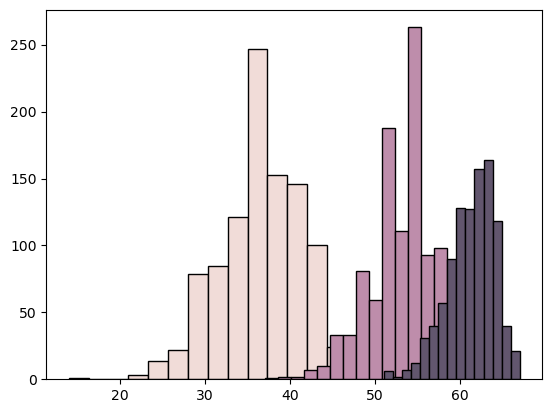

In [19]:
a11=plt.hist(TW1NTn[6] ,bins=15,color="#f1dcd8",edgecolor = 'black')
a21=plt.hist(TW2NTn[6] ,bins=15,color="#be8dab",edgecolor = 'black')
a1=plt.hist(TW3NTn[6] ,bins=15,color="#62566e",edgecolor = 'black')

In [201]:
display(a1,a2,a3)

(array([  1.,   0.,   0.,   3.,  14.,  22.,  79.,  85., 121., 247., 153.,
        146., 100.,  24.,   5.]),
 array([14.        , 16.33333333, 18.66666667, 21.        , 23.33333333,
        25.66666667, 28.        , 30.33333333, 32.66666667, 35.        ,
        37.33333333, 39.66666667, 42.        , 44.33333333, 46.66666667,
        49.        ]),
 <BarContainer object of 15 artists>)

(array([  1.,   2.,   2.,   7.,  10.,  33.,  33.,  81.,  59., 188., 111.,
        263.,  93.,  98.,  19.]),
 array([37.        , 38.53333333, 40.06666667, 41.6       , 43.13333333,
        44.66666667, 46.2       , 47.73333333, 49.26666667, 50.8       ,
        52.33333333, 53.86666667, 55.4       , 56.93333333, 58.46666667,
        60.        ]),
 <BarContainer object of 15 artists>)

(array([  6.,   2.,   7.,  12.,  31.,  40.,  57.,  90., 128., 127., 157.,
        164., 118.,  40.,  21.]),
 array([51.        , 52.06666667, 53.13333333, 54.2       , 55.26666667,
        56.33333333, 57.4       , 58.46666667, 59.53333333, 60.6       ,
        61.66666667, 62.73333333, 63.8       , 64.86666667, 65.93333333,
        67.        ]),
 <BarContainer object of 15 artists>)

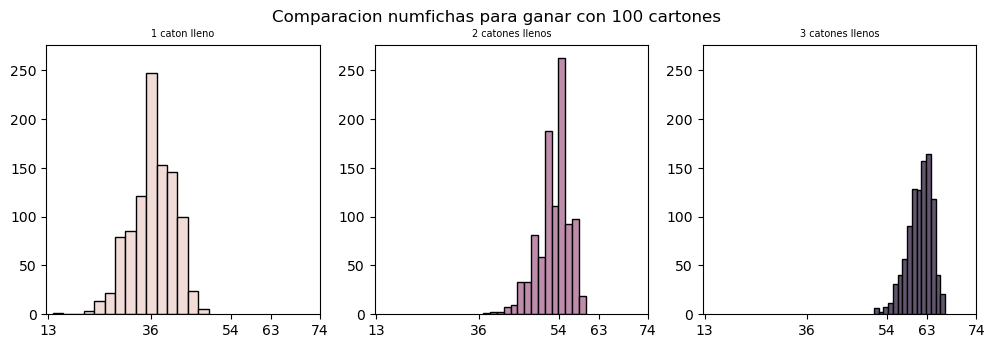

In [23]:
i=6
bins = 15
fsize=7
f6, axs1 = plt.subplots(1,3, figsize=(12, 3.5))

a1= axs1[0].hist(TW1NTn[i] ,bins=bins,color="#f1dcd8",edgecolor = 'black')
a2= axs1[1].hist(TW2NTn[i] ,bins=bins,color='#be8dab',edgecolor = 'black')
a3= axs1[2].hist(TW3NTn[i] ,bins=bins,color="#62566e",edgecolor = 'black')

minx_ = a1[1].min()-a1[1].min()*.1
maxx_ = a3[1].max()+a3[1].max()*.1
maxy_ = max([a1[0].max(),a2[0].max(),a3[0].max()]) 
xticks = ticks_hist(a1,a2,a3)

axs1[0].set_ylim(0,maxy_+maxy_*.05)
axs1[1].set_ylim(0,maxy_+maxy_*.05)
axs1[2].set_ylim(0,maxy_+maxy_*.05)
axs1[0].set_xlim(minx_,maxx_)
axs1[1].set_xlim(minx_,maxx_)
axs1[2].set_xlim(minx_,maxx_)
axs1[0].set_xticks(xticks)
axs1[1].set_xticks(xticks)
axs1[2].set_xticks(xticks)
axs1[0].set_title("1 caton lleno",fontsize=fsize)
axs1[1].set_title("2 catones llenos",fontsize=fsize)
axs1[2].set_title("3 catones llenos",fontsize=fsize)

if i>5:
    f6.suptitle("Comparacion numfichas para ganar con "+str(100)+" cartones\n \n")
    f6.savefig("media/hist_comp_numFichas2win"+str(100)+"carts.png")
else:
    f6.suptitle("Comparacion numfichas para ganar con "+str(5+5*i)+" cartones\n \n")
    f6.savefig("media/hist_comp_numFichas2win"+str(5+5*i)+"carts.png")
    


In [198]:
maxy_+maxy_*.05

276.15

In [14]:

## prototipo para graficar la comparativa de datos cuando cambia el numero de cartones
## para 1 dos y 3 cartones llenos
## Quiero hacer una funcion que grafique de 5 hasta 30 en una sola figura
## ademas cambiar las marcas para reconocer los maximo de cada pico como texto agregado con flechas
## 


def data_hist_indi (data,T2W):
    TWnNTn = []
    for i in range(7):
        if i==6:
            indi = i+13
            TWnNTn.append(data["fichasToWin"][(data["numTablas"]==(5+5*indi)) 
                                                &(data["tab2win"]==T2W)   ].tolist())
        else:
            TWnNTn.append(data["fichasToWin"][(data["numTablas"]==(5+5*i)) 
                                                &(data["tab2win"]==T2W)   ].tolist())

    return TWnNTn

def ticks_hist(a1,a2,a3):
    tickx1=round(a1[1][np.argmax(a1[0])]+(int((a1[1][1]-a1[1][0])/2)))
    tickx2=round(a2[1][np.argmax(a2[0])]+(int((a2[1][1]-a2[1][0])/2)))
    tickx3=round(a3[1][np.argmax(a3[0])]+(int((a3[1][1]-a3[1][0])/2)))
    tickxminx_ = round(a1[1].min()-a1[1].min()*.1)
    tickxmaxx_ = round(a3[1].max()+a3[1].max()*.1)
    return [tickxminx_,tickx1,tickx2,tickx3,tickxmaxx_]

def hist_fich2win_tab2win(df_data123,i,bins):
    
    #i=2
    fsize= 7
    #bins = 18
    
    TW1NTn = data_hist_indi (df_loto123,1)
    TW2NTn = data_hist_indi (df_loto123,2)
    TW3NTn = data_hist_indi (df_loto123,3)

    f, axs1 = plt.subplots(1,3, figsize=(12, 3.5))

    a1= axs1[0].hist(TW1NTn[i] ,bins=bins,color="#f1dcd8",edgecolor = 'black')
    a2= axs1[1].hist(TW2NTn[i] ,bins=bins,color='#be8dab',edgecolor = 'black')
    a3= axs1[2].hist(TW3NTn[i] ,bins=bins,color="#62566e",edgecolor = 'black')

    minx_ = a1[1].min()-a1[1].min()*.1
    maxx_ = a3[1].max()+a3[1].max()*.1
    maxy_ = max([a1[0].max(),a2[0].max(),a3[0].max()]) 
    xticks = ticks_hist(a1,a2,a3)

    axs1[0].set_ylim(0,maxy_+maxy_*.05)
    axs1[1].set_ylim(0,maxy_+maxy_*.05)
    axs1[2].set_ylim(0,maxy_+maxy_*.05)
    axs1[0].set_xlim(minx_,maxx_)
    axs1[1].set_xlim(minx_,maxx_)
    axs1[2].set_xlim(minx_,maxx_)
    axs1[0].set_xticks(xticks)
    axs1[1].set_xticks(xticks)
    axs1[2].set_xticks(xticks)
    axs1[0].set_title("1 caton lleno",fontsize=fsize)
    axs1[1].set_title("2 catones llenos",fontsize=fsize)
    axs1[2].set_title("3 catones llenos",fontsize=fsize)

    if i>5:
        f.suptitle("Comparacion numfichas para ganar con "+str(100)+" cartones\n \n")
        f.savefig("media/hist_comp_numFichas2win"+str(100)+"carts.png")
    else:
        f.suptitle("Comparacion numfichas para ganar con "+str(5+5*i)+" cartones\n \n")
        f.savefig("media/hist_comp_numFichas2win"+str(5+5*i)+"carts.png")
    
    
    return f

In [15]:
%%capture
f0=hist_fich2win_tab2win(df_nloto_123,0,15)
f1=hist_fich2win_tab2win(df_nloto_123,1,15)
f2=hist_fich2win_tab2win(df_nloto_123,2,15)
f3=hist_fich2win_tab2win(df_nloto_123,3,15)
f4=hist_fich2win_tab2win(df_nloto_123,4,15)
f5=hist_fich2win_tab2win(df_nloto_123,5,15)

/tmp/ipykernel_9296/278975390.py:50: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs1[0].set_ylim(0,maxy_+maxy_*.05)
/tmp/ipykernel_9296/278975390.py:51: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs1[1].set_ylim(0,maxy_+maxy_*.05)
/tmp/ipykernel_9296/278975390.py:52: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs1[2].set_ylim(0,maxy_+maxy_*.05)


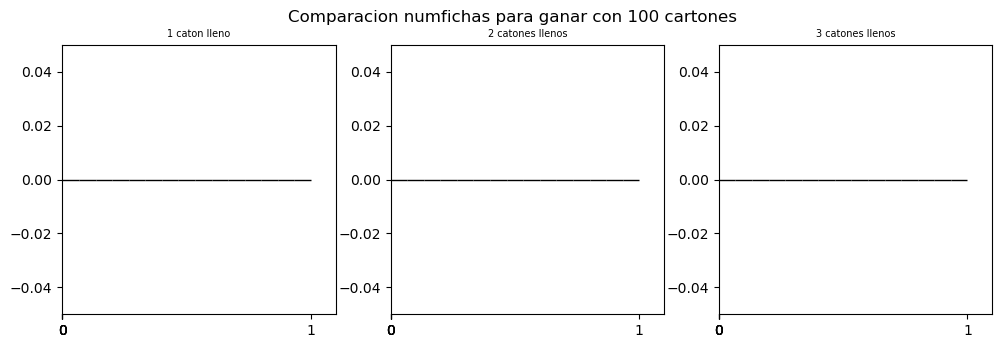

In [16]:
#f6=hist_fich2win_tab2win(df_nloto_123,6,15)
#Desconozco el error

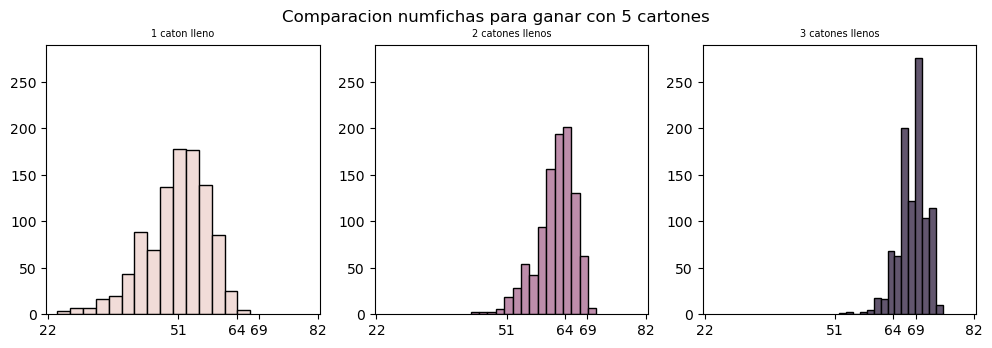

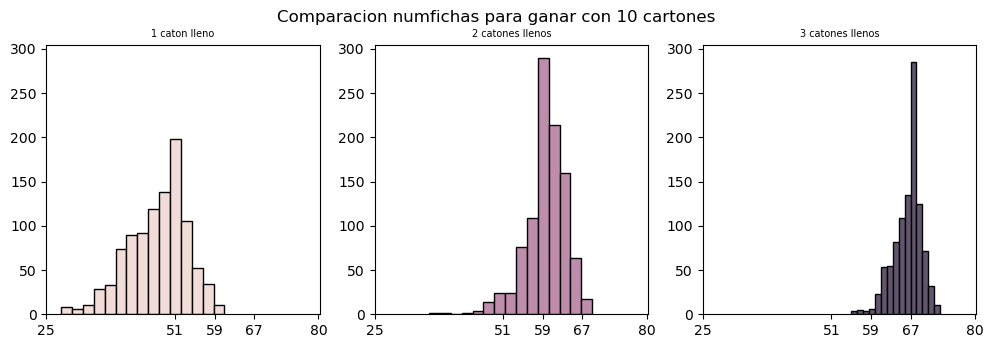

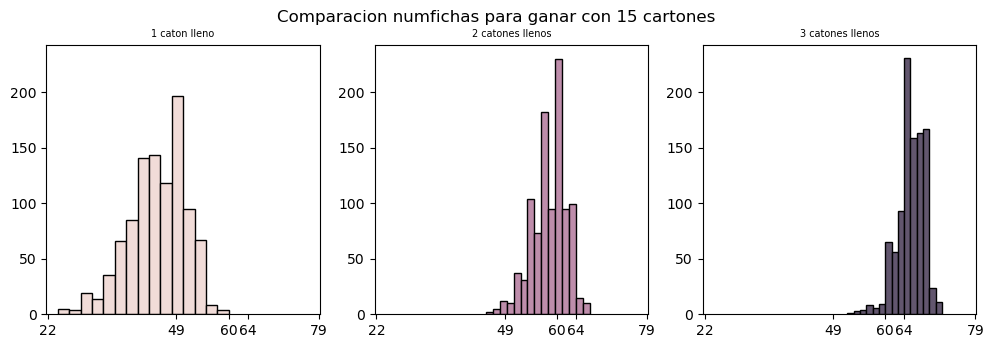

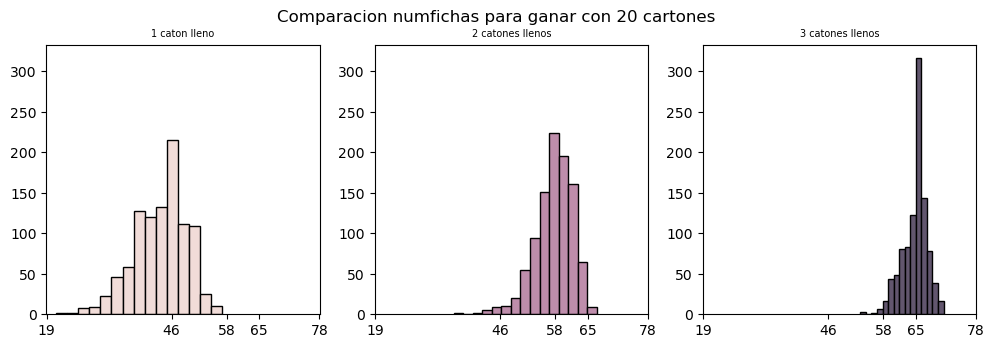

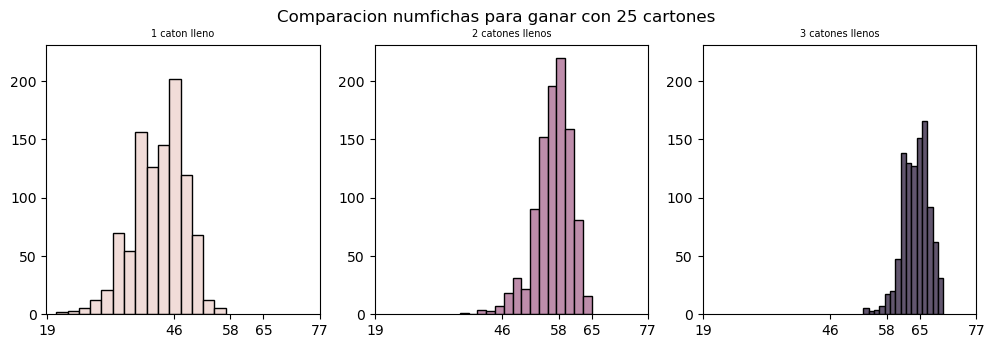

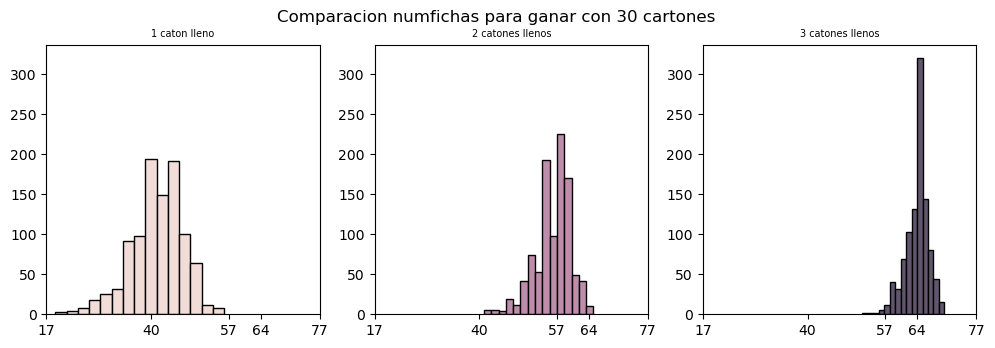

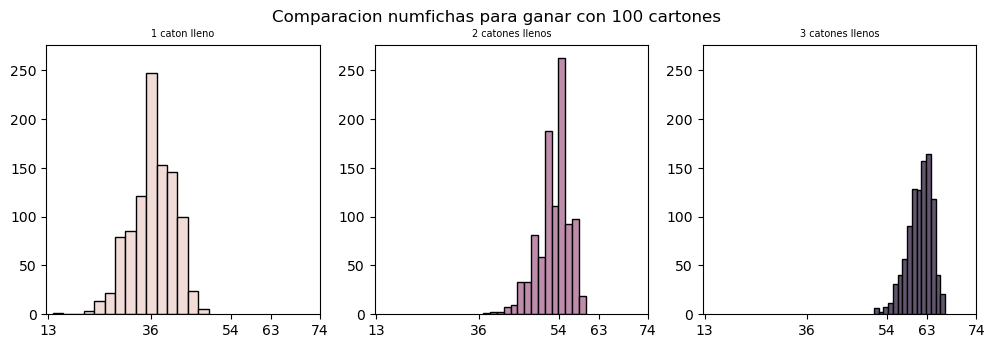

In [24]:
display(f0,f1,f2,f3,f4,f5,f6)

/tmp/ipykernel_6815/3872557378.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1["fichasToWin"].hist(by=df1["numTablas"], bins=18,ax=axs1,color="black")
/tmp/ipykernel_6815/3872557378.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2["fichasToWin"].hist(by=df2["numTablas"], bins=18,ax=axs2,color="red")
/tmp/ipykernel_6815/3872557378.py:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df3["fichasToWin"].hist(by=df3["numTablas"], bins=18,ax=axs3)


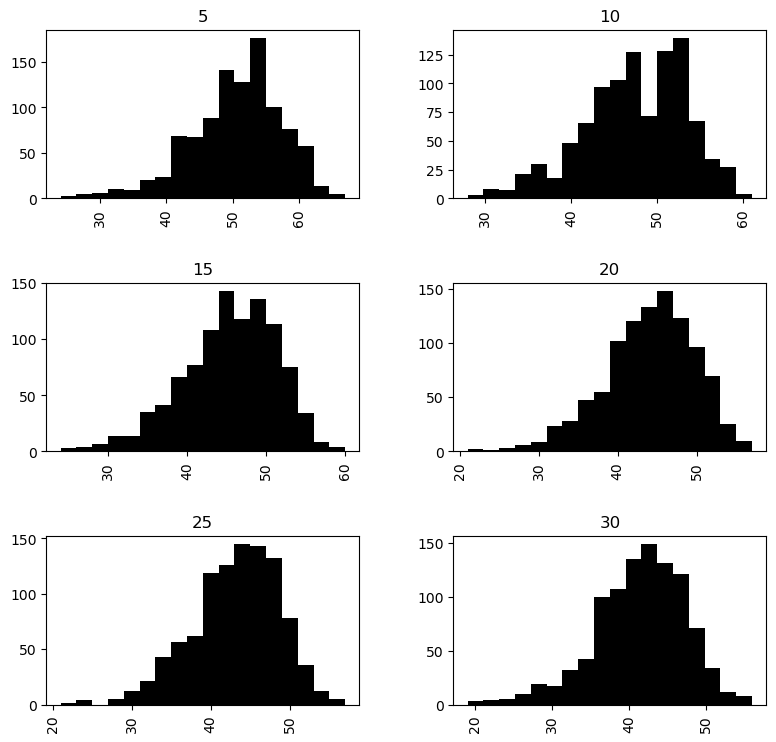

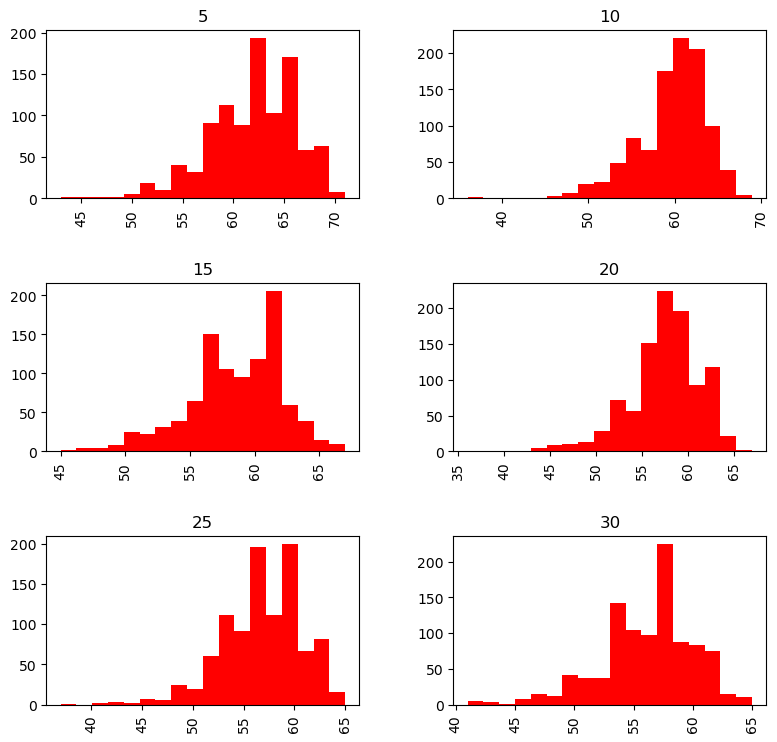

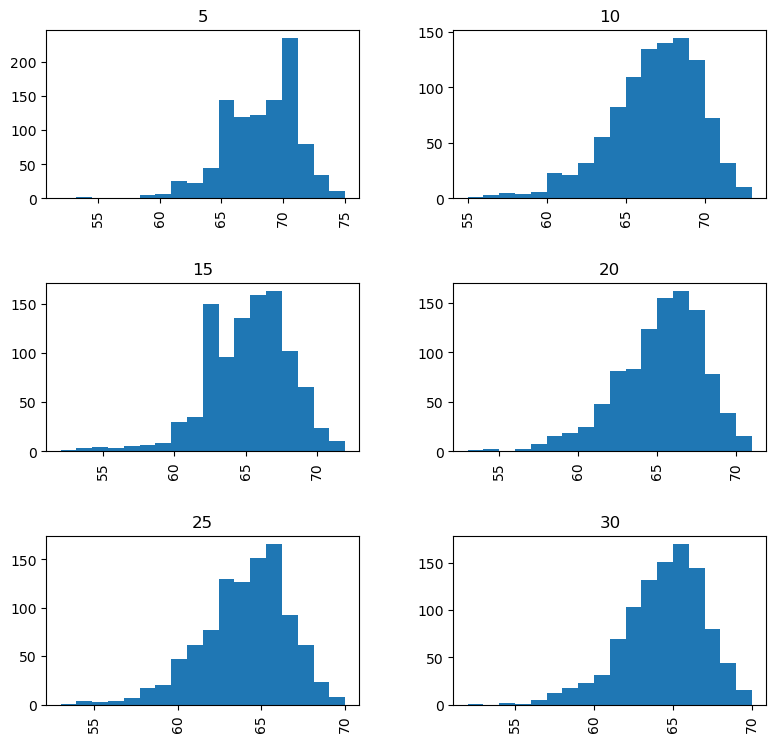

In [136]:

f, axs1 = plt.subplots( figsize=(9, 9))

df1["fichasToWin"].hist(by=df1["numTablas"], bins=18,ax=axs1,color="black")

f, axs2 = plt.subplots( figsize=(9, 9))

df2["fichasToWin"].hist(by=df2["numTablas"], bins=18,ax=axs2,color="red")

f, axs3 = plt.subplots( figsize=(9, 9))

df3["fichasToWin"].hist(by=df3["numTablas"], bins=18,ax=axs3)


plt.show()

In [159]:

np.histogram(df3["fichasToWin"].loc[df3["numTablas"]==5],bins=18)

(array([  1,   2,   0,   1,   1,   5,   7,  26,  23,  45, 144, 119, 122,
        144, 236,  80,  34,  10]),
 array([52.        , 53.27777778, 54.55555556, 55.83333333, 57.11111111,
        58.38888889, 59.66666667, 60.94444444, 62.22222222, 63.5       ,
        64.77777778, 66.05555556, 67.33333333, 68.61111111, 69.88888889,
        71.16666667, 72.44444444, 73.72222222, 75.        ]))

In [158]:
np.histogram(df3["fichasToWin"].loc[df3["numTablas"]==10],bins=18)

(array([  1,   3,   5,   4,   6,  23,  21,  32,  55,  82, 109, 135, 140,
        145, 125,  72,  32,  10]),
 array([55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
        68., 69., 70., 71., 72., 73.]))

# Cuantas veces gana?

Vamos a contar cuantas veces gano el primer carton

In [228]:
unique, counts = numpy.unique(aUnique, return_counts=True)

>>>print(dict(zip(unique, counts)));  
{0: 1, 10: 2, 20: 1, 30: 1, 40: 1, 70: 2, 80: 3, 100: 4}

SyntaxError: invalid syntax (1391957967.py, line 3)

Queremos ver si identificamos los cartones como stirng


In [188]:
# Tengo que convertir a str para estar seguro que identifica el carton
strTbWns = []

In [190]:
for tb in  df1["tabsWins"]:
    strTbWns.append(str(tb[0]))
strTbWns

['[34, 68, 51, 54, 53, 42, 37, 26]',
 '[14, 51, 44, 9, 64, 60, 31, 41]',
 '[58, 51, 74, 4, 70, 17, 43, 52]',
 '[20, 27, 32, 2, 73, 3, 79, 12]',
 '[9, 49, 67, 19, 50, 79, 65, 5]',
 '[76, 4, 2, 43, 11, 64, 31, 23]',
 '[30, 47, 26, 53, 19, 20, 74, 46]',
 '[6, 9, 77, 13, 37, 39, 61, 31]',
 '[12, 76, 35, 4, 26, 60, 9, 38]',
 '[77, 4, 29, 22, 2, 65, 7, 55]',
 '[17, 38, 70, 69, 78, 59, 27, 36]',
 '[40, 21, 65, 55, 52, 49, 36, 50]',
 '[25, 60, 8, 3, 63, 31, 1, 52]',
 '[57, 6, 30, 74, 18, 22, 70, 51]',
 '[48, 58, 21, 42, 62, 53, 73, 15]',
 '[76, 2, 13, 1, 52, 37, 65, 57]',
 '[72, 73, 3, 32, 9, 6, 19, 70]',
 '[60, 29, 12, 33, 38, 6, 54, 1]',
 '[74, 75, 69, 37, 4, 31, 44, 35]',
 '[37, 68, 76, 39, 23, 1, 18, 19]',
 '[77, 23, 73, 3, 41, 39, 33, 19]',
 '[41, 54, 24, 39, 74, 29, 49, 64]',
 '[69, 6, 27, 42, 63, 71, 77, 50]',
 '[32, 60, 25, 29, 78, 42, 43, 33]',
 '[20, 35, 74, 40, 1, 77, 6, 76]',
 '[70, 40, 56, 2, 66, 46, 35, 55]',
 '[76, 15, 23, 11, 18, 58, 78, 16]',
 '[14, 28, 68, 23, 55, 36, 25, 46]

In [191]:
uni, coun = np.unique(strTbWns,return_counts=True)
display(tab1, coun[coun>1] ,uni[coun>1])

array([[56, 71, 58, 78, 40, 76,  6, 12],
       [15, 66, 62, 26, 57, 74,  9, 37],
       [17, 55, 10, 27, 72, 68, 16, 47],
       [ 8, 46, 31, 42, 54, 29, 51, 38],
       [34, 13,  5, 20, 79, 22, 32, 61],
       [19, 36, 30, 44, 63,  2, 77, 28]])

array([ 94, 102,  96,  79, 104,  72])

array(['[15, 66, 62, 26, 57, 74, 9, 37]',
       '[17, 55, 10, 27, 72, 68, 16, 47]',
       '[19, 36, 30, 44, 63, 2, 77, 28]',
       '[34, 13, 5, 20, 79, 22, 32, 61]',
       '[56, 71, 58, 78, 40, 76, 6, 12]',
       '[8, 46, 31, 42, 54, 29, 51, 38]'], dtype='<U32')

Arriba tenemos lo que queriamos por via str.

Queremos ver si identificamos los cartones como arreglos

In [129]:
tab1[0].tolist()

[56, 71, 58, 78, 40, 76, 6, 12]

In [159]:
unique, counts = np.unique(df1["tabsWins"],return_counts=True)

In [227]:
for tab in unique:
    if (tab[0]==tab1[5].tolist()):
        print(tab)

NameError: name 'unique' is not defined

In [28]:
tab1

NameError: name 'tab1' is not defined

In [160]:
unique[counts>1], counts[counts>1]        

(array([list([[8, 46, 31, 42, 54, 29, 51, 38]]),
        list([[15, 66, 62, 26, 57, 74, 9, 37]]),
        list([[17, 55, 10, 27, 72, 68, 16, 47]]),
        list([[19, 36, 30, 44, 63, 2, 77, 28]]),
        list([[34, 13, 5, 20, 79, 22, 32, 61]]),
        list([[56, 71, 58, 78, 40, 76, 6, 12]])], dtype=object),
 array([ 72,  94, 102,  96,  79, 104]))

Arriba aparece un carton de la pirmera tabla 1 ves en todas las loterias, algo que no me resulta coherente

Ahora queremos lo mismo para mas de 1 un carton

2 cartones str

In [ ]:
strTbWns=[]
for tb in  df2["tabsWins"]:
    #print(str(tb))
    strTbWns.append(str(tb))
uni, coun = np.unique(strTbWns,return_counts=True)

display(tab1,coun[coun>1],uni[coun>1])

A pesar de que la siguente funcion no tenga tanto sentido debido a que los datos simulado con el modo unico, 
solo el primer carton tienen posibilidad de ganar, dibido a que el resto de las tablas nunca van a repetirse. Pero en una simulacion posterior vamos todos los cartones van a ser los mismos por lo tanto, tendremos repetido mas de un vez todos los cartones, justo aqui es cuando comprobamos cuantas veces nuestra tabla es ganadora, para luego contrastar estos datos nuevos con otra simulacion con una distribucion diferente.

In [31]:
def count_tabsWin(tab,vwin,df_tabWin): # Cuenta cuantas veces la tabla gana mi carton de la data
    strTbWns_j =[]
    strTbWns =[] 
    coun_tab = []
    uni_tab = []
    
    
    for tb in df_tabWin: # Conteo junto  # Concatena los cartones juntos (2 y 3 cartones llenos)
        strTbWns_j.append(str(tb)) # lista de cartones juntos.
        
    for tb in df_tabWin:    # Conteo separado
        temp_strTbWns =[]
        for ti in tb:
            temp_strTbWns.append(str(ti)) # Separa los cartones y los concatena en partes
    
        strTbWns.append(temp_strTbWns) # Concatena parte a la lista para contar

    # Conteo de ambas combinaciones
    
    uni_j, coun_j = np.unique(strTbWns_j,return_counts=True)
    uni, coun = np.unique(strTbWns,return_counts=True)
    
    for t in tab[0]:       # Esta parte es para cuando tenga fijo el numero de cartones
        t_str =str([t[0],t[1],t[2],t[3]
                   ,t[4],t[5],t[6],t[7]])
        coun_tab.append(coun[uni==t_str])
        uni_tab.append(t_str)
    
    
    return pd.Series({"cont_junto":coun_j[coun_j>vwin] # Veces  que gano con combinacion de cartones
                      ,"uni_junto":uni_j[coun_j>vwin]  # Combinación de cartones ganador
                      , "cont":coun[coun>vwin]         # Veces que gana 1 carton sin importar la combinacion 
                      , "uni":uni[coun>vwin]           # Cartones individuales ganadores
                      ,"cont_tab":coun_tab          # Cuantas veces mis cartones ganan
                      ,"uni_tab":uni_tab})          # mis cartones

###   Cuenta cuantas veces que mi tabla gana   ###      
            



In [38]:
count_tabsWin(tab1,df_1o80_lt1["tabs"])  

cont_junto                                         [2, 3, 2, 3]
uni_junto     [[[17, 55, 10, 27, 72, 68, 16, 47]], [[19, 36,...
cont                                               [2, 3, 2, 3]
uni           [[17, 55, 10, 27, 72, 68, 16, 47], [19, 36, 30...
cont_tab                         [[2], [1], [2], [3], [1], [3]]
uni_tab       [[56, 71, 58, 78, 40, 76, 6, 12], [15, 66, 62,...
dtype: object

In [33]:
count_tabsWin(tab1,df_1o80_lt2["tabs"])  

cont_junto    [2, 2, 3, 2, 2, 4, 2, 2, 4, 3, 2, 2, 3, 2, 2, ...
uni_junto     [[[1, 17, 31, 55, 27, 13, 57, 3], [66, 33, 78,...
cont          [5, 4, 5, 2, 7, 4, 3, 4, 9, 4, 3, 9, 2, 2, 2, ...
uni           [[1, 15, 50, 3, 36, 67, 43, 55], [1, 17, 31, 5...
cont_tab                         [[5], [5], [2], [5], [4], [5]]
uni_tab       [[56, 71, 58, 78, 40, 76, 6, 12], [15, 66, 62,...
dtype: object

In [34]:
a=count_tabsWin(tab1,df_1o80_lt3["tabs"])  

In [35]:
display(a.uni_tab,tab1)

['[56, 71, 58, 78, 40, 76, 6, 12]',
 '[15, 66, 62, 26, 57, 74, 9, 37]',
 '[17, 55, 10, 27, 72, 68, 16, 47]',
 '[8, 46, 31, 42, 54, 29, 51, 38]',
 '[34, 13, 5, 20, 79, 22, 32, 61]',
 '[19, 36, 30, 44, 63, 2, 77, 28]']

[array([[56, 71, 58, 78, 40, 76,  6, 12],
        [15, 66, 62, 26, 57, 74,  9, 37],
        [17, 55, 10, 27, 72, 68, 16, 47],
        [ 8, 46, 31, 42, 54, 29, 51, 38],
        [34, 13,  5, 20, 79, 22, 32, 61],
        [19, 36, 30, 44, 63,  2, 77, 28]])]

In [37]:
a

cont_junto    [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, ...
uni_junto     [[[1, 49, 59, 67, 35, 33, 56, 29], [64, 77, 12...
cont          [6, 4, 4, 4, 4, 8, 5, 12, 5, 4, 10, 6, 6, 3, 3...
uni           [[1, 15, 50, 3, 36, 67, 43, 55], [1, 17, 31, 5...
cont_tab                        [[4], [6], [5], [5], [6], [10]]
uni_tab       [[56, 71, 58, 78, 40, 76, 6, 12], [15, 66, 62,...
dtype: object

In [36]:
re.findall("\[\d.*?\]",a.uni_junto[0])

['[1, 49, 59, 67, 35, 33, 56, 29]',
 '[64, 77, 12, 48, 71, 9, 57, 39]',
 '[47, 75, 6, 15, 53, 54, 37, 76]']

In [81]:
a.uni_tab

['[56, 71, 58, 78, 40, 76, 6, 12]',
 '[15, 66, 62, 26, 57, 74, 9, 37]',
 '[17, 55, 10, 27, 72, 68, 16, 47]',
 '[8, 46, 31, 42, 54, 29, 51, 38]',
 '[34, 13, 5, 20, 79, 22, 32, 61]',
 '[19, 36, 30, 44, 63, 2, 77, 28]']

In [39]:
%%capture
cont_tab = 0
for tab in a.uni_junto:
    cont_tab = 1
    print(f'El conjunto {cont_tab} : {tab}')
    for tab in re.findall("\[\d.*?\]",tab):
        cont_index =1 
        
        for mytab in a.uni_tab:
            if(mytab==tab):
                print(f'carton {cont_index} : {mytab}')
            cont_index +=1
    cont_tab +=1    

In [1]:
def count_times_win(data_a): # cuales cartones de mi tab estan dentro de la combinacion de cartones ganadores
    tab2win = []
    uni_junto = []
    idxs_tabs = []
    mycarts = []
    
    cont_tab = 0
    for tab in data_a.uni_junto:
        cont_tab = 1
        tab2win.append(len(re.findall("\[\d.*?\]",a.uni_junto[0])))
        uni_junto.append(tab)
        t_mycarts = []
        t_idxs_tabs = []
        #print(f'El conjunto {cont_tab} : {tab}')
        for tab in re.findall("\[\d.*?\]",tab):
            cont_index =1 

            for mytab in a.uni_tab:
                if(mytab==tab):
                    t_mycarts.append(mytab) # mis cartones ganadores
                    t_idxs_tabs.append(cont_index) # Indice de mis cartones ganadores
                    #print(f'carton {cont_index} : {mytab}')
                cont_index +=1
        mycarts.append(t_mycarts)
        idxs_tabs.append(t_idxs_tabs)
        
        cont_tab +=1
        
    return pd.Series({ "cart_juntos":uni_junto  
                       ,   "tab2win":tab2win    
                       , "idxs_tabs":idxs_tabs  
                       ,    "mytabs": mycarts
                      })

# cuales cartones de mi tab estan dentro de la combinacion de cartones ganadores      
            
    #  gen_cartones(nfichas,tabs, metodo)
    #  count_tabsWin(tab,vwin,df_tabWin)
    #  count_times_win(data_a) # Data de count_tabsWin
       

In [41]:
ctw = count_times_win(a)

In [42]:
for i in range(len(ctw[0])):
    print(f'Lc: {ctw.mytabs[i]} \nMis carts: {ctw.cart_juntos[i]}\n Indices de mis cartones: {ctw.idxs_tabs[i]}')


Lc: [] 
Mis carts: [[1, 49, 59, 67, 35, 33, 56, 29], [64, 77, 12, 48, 71, 9, 57, 39], [47, 75, 6, 15, 53, 54, 37, 76]]
 Indices de mis cartones: []
Lc: [] 
Mis carts: [[1, 49, 59, 67, 35, 33, 56, 29], [70, 41, 28, 62, 46, 11, 43, 7], [30, 21, 79, 61, 60, 45, 55, 58]]
 Indices de mis cartones: []
Lc: [] 
Mis carts: [[10, 4, 52, 50, 51, 56, 32, 28], [16, 64, 38, 26, 76, 34, 61, 69], [37, 70, 74, 68, 8, 42, 7, 79]]
 Indices de mis cartones: []
Lc: [] 
Mis carts: [[10, 4, 52, 50, 51, 56, 32, 28], [24, 73, 77, 55, 14, 1, 58, 36], [37, 70, 74, 68, 8, 42, 7, 79]]
 Indices de mis cartones: []
Lc: [] 
Mis carts: [[10, 4, 52, 50, 51, 56, 32, 28], [5, 59, 78, 20, 75, 2, 21, 66], [16, 64, 38, 26, 76, 34, 61, 69]]
 Indices de mis cartones: []
Lc: [] 
Mis carts: [[10, 4, 52, 50, 51, 56, 32, 28], [5, 59, 78, 20, 75, 2, 21, 66], [24, 73, 77, 55, 14, 1, 58, 36]]
 Indices de mis cartones: []
Lc: [] 
Mis carts: [[10, 4, 52, 50, 51, 56, 32, 28], [5, 59, 78, 20, 75, 2, 21, 66], [37, 70, 74, 68, 8, 42, 7, 7

In [43]:
ctw.idxs_tabs[0]
for i in range(len(ctw.idxs_tabs)):

SyntaxError: incomplete input (1475516834.py, line 2)

In [147]:
np.unique(ctw.mytabs,return_counts=True)

(array(['[15, 66, 62, 26, 57, 74, 9, 37]',
        '[17, 55, 10, 27, 72, 68, 16, 47]',
        '[19, 36, 30, 44, 63, 2, 77, 28]',
        '[34, 13, 5, 20, 79, 22, 32, 61]',
        '[56, 71, 58, 78, 40, 76, 6, 12]',
        '[8, 46, 31, 42, 54, 29, 51, 38]'], dtype='<U32'),
 array([10, 10, 10, 10, 10, 10]))

In [2]:
int_b = re.findall("(\d+)",tab)

NameError: name 're' is not defined

Esto es para generar la lista de cartones indexarlos y contar cuantas veces gano



In [ ]:
all_tab_sorteo[all_tab_sorteo==str(data_loto[55][0])]

In [ ]:
for j in d_tab:
        idx = '{0:0>2}'.format(cont) # Formato a 2 caracteres: (para 3 caracteres '{0:0>3}')

        for i in zip(card,j):
            idx_tabs.append(idx)     # idx tablas
            idx_card.append(i[0])    # idx cartones
            tab_list.append(str(i[1].tolist())) # cartones
            
            #print(i[1].tolist())

        cont +=1

    index = pd.MultiIndex.from_tuples(list(zip(idx_tabs,idx_card)),names=['tab','card'])
      

In [ ]:
# Test 
n_sorteo = len(data_loto)
indx_sorteo = []
indx_sort_cart = []

if (len(data_loto[0])==1):
    in_cart = ['A']
elif (len(data_loto[0])==2):
    in_cart = ['A','B']
elif (len(data_loto[0])==3):
    in_cart = ['A','B','C']
        
for cont in range(n_sorteo):
    idx = '{0:0>4}'.format(cont) # Formato a 2 caracteres: (para 3 caracteres '{0:0>3}')
    for card in in_cart:
        indx_sorteo.append(idx)
        indx_sort_cart.append(card)
    
index = pd.MultiIndex.from_tuples(list(zip(indx_sorteo,indx_sort_cart)),names=['tab','card'])
len(index)
all_tab_sorteo = pd.Series(strTbWns_all,index=index)

In [ ]:
# test  0007

## Entrada

mpx_list = lista_tabs_mpx(tabla)
data_loto = df_1o80_lt2['tabs']

## Variables
strTbWns_all =[]
coun_tab = []
uni_tab = []
    

##
t_tabl = data_loto.copy()          # Data de cartones ganadores "tablas_1o80_lt2" 
#list_tabl = list_de_tabla.copy()   # Data de lista solo las tablas jugando
count_tab =  pd.Series(np.zeros(len(mpx_list),int)
                        # conteo en 0
                       ,index=mpx_list.index        # indice de lista de tablas
                       ,name='conteo de victorias')  # Nombre de la Series
test_tab = pd.Series(np.zeros(len(mpx_list),int)
                        # conteo en 0
                       ,index=mpx_list.index        # indice de lista de tablas
                       ,name='prueba de victorias')  # Nombre de la Series


for tb in data_loto:    # Lista por cartones
        #temp_strTbWns =[]
        #print(tb)
        for ti in tb:
            #print(str(ti))
            strTbWns_all.append( str(ti))
            #temp_strTbWns.append(str(ti)) # Separa los cartones y los concatena en partes
            
unique_cart, unique_count =np.unique(strTbWns_all,return_counts=True)

for info in zip(unique_cart,unique_count):
    idx = mpx_list[mpx_list==info[0]].index[0]
    count_tab[idx] = info[1]
    
    #print(idx,count_tab[idx])

Vamos a generar la funcion para automatizar el protoripo

In [ ]:
# Hace una lisdata multiplexada (Tab,Cartones) de todas la tablas

def lista_tabs_mpx(d_tab): # Retorna la lista indexada de tablas y cartones
    cont =0
    card = ['A','B','C','D','E','F'] # IDX de cartones
    
    tab_list = []                    # lista de tablas
    idx_tabs = []                    # list. indices tablas
    idx_card = []                    # list. indices cartones
    
    for j in d_tab:
        idx = '{0:0>2}'.format(cont) # Formato a 2 caracteres: (para 3 caracteres '{0:0>3}')

        for i in zip(card,j):
            idx_tabs.append(idx)     # idx tablas
            idx_card.append(i[0])    # idx cartones
            tab_list.append(str(i[1].tolist())) # cartones
            
            #print(i[1].tolist())

        cont +=1

    index = pd.MultiIndex.from_tuples(list(zip(idx_tabs,idx_card)),names=['tab','card'])
    
    return pd.Series(tab_list, index=index)

###   Hace el conteo de la data con los cartones ganadores 

def count_tabl_win_mpx(data_loto,list_de_tabla):
    t_tabl = data_loto.copy()          # Data de cartones ganadores "tablas_1o80_lt2" 
    list_tabl = list_de_tabla.copy()   # Data de lista solo las tablas jugando
    count_tab =  pd.Series(np.zeros(len(list_tabl), int) # conteo en 0
                           ,index=list_tabl.index        # indice de lista de tablas
                           ,name='conteo de victorias')  # Nombre de la Series
    
    # Cuenta cuantas veces la tabla gana mi carton de la data    
    for j_tab in t_tabl:    # Iteracion sobre la lista de cartones ganadores
        for tab in j_tab:   # Iteracion sobre los cartones ganades
            idx=list_tabl[list_tabl==str(tab)].index
            count_tab[idx] += 1
    
    return count_tab

Muestra

In [ ]:

mpx_list[mpx_list==unique_cart[0]].index[0]


In [ ]:
# Con el metodo viejo
tab1,xx = gen_cartones(80,1, "mismos")
display(tab1[0].tolist())

a3=count_tabsWin(tab1,0,df_1o80_lt3["tabs"])  
a2=count_tabsWin(tab1,0,df_1o80_lt2["tabs"])  
#a1=count_tabsWin(tab1,0,df_1o80_lt1["tabs"])  

In [ ]:
# Con el metodo nuevo
# Varaibles

tabla5,xx = gen_cartones(80,5, "mismos")
tabla,xx = gen_cartones(80,100, "mismos")


mpx_list5 = lista_tabs_mpx(tabla5)# 5 tablas
mpx_list  = lista_tabs_mpx(tabla) # 100 tablas

#cuenta1 = count_tabl_win_( df_1o80_lt1['tabs'],mpx_list)
cuenta2 = count_tabl_win_mpx( df_1o80_lt2['tabs'],mpx_list)
cuenta3 = count_tabl_win_mpx( df_1o80_lt3['tabs'],mpx_list)

In [ ]:
# para 3 cartones


i = 10
carton=a3.uni[i]
idx = mpx_list[mpx_list==carton].index[0]
count_old = a3.cont[i]
count_new = cuenta3[idx]

print(f' El carton {idx}: {carton}, ha ganado {count_old} veces viejo y {count_new} veces nuevo')

In [ ]:
# para 3 cartones
i = 4
carton=a3.uni[i]
idx = mpx_list[mpx_list==carton].index[0]
count_old = a2.cont[i]
count_new = cuenta2[idx]

print(f' El carton {idx}: {carton}, ha ganado {count_old} veces viejo y {count_new} veces nuevo')

Hay que revisar el resultado de `count_tabsWin(tab,vwin,df_tabWin)` contrastado con el resultado de `count_tabl_win_mpx(data_loto,list_de_tabla)` porque para 2 cartones no  concuerdan los resultados y para 1 resultado esta última funcion no esta corriendo, Voy a continuar con los datos completos de esta seccion del analsis. Es decir, las 3era simulación, recordemos que antes de responder cuantas veces gano, cargue 100 datos de cada dataframe para incluir el histograma de las 100 tablas en la grafica anterior donde muestro la incidencia del número de catones sobre el  número de cartones fichas cantadas. 

In [ ]:
# Cuenta cuantas veces la tabla gana mi carton de la data    
for j_tab in t_tabl:    # Iteracion sobre la lista de cartones ganadores
    for tab in j_tab:   # Iteracion sobre los cartones ganades
        idx=list_tabl[list_tabl==str(tab)].index
        count_tab[idx] += 1

return count_tab

In [ ]:
strTbWns_j =[]
    strTbWns =[] 
    coun_tab = []
    uni_tab = []
    
    
    for tb in df_tabWin: # Conteo junto  # Concatena los cartones juntos (2 y 3 cartones llenos)
        strTbWns_j.append(str(tb)) # lista de cartones juntos.
        
    for tb in df_tabWin:    # Conteo separado
        temp_strTbWns =[]
        for ti in tb:
            temp_strTbWns.append(str(ti)) # Separa los cartones y los concatena en partes
    
        strTbWns.append(temp_strTbWns) # Concatena parte a la lista para contar

    # Conteo de ambas combinaciones
    
    uni_j, coun_j = np.unique(strTbWns_j,return_counts=True)
    uni, coun = np.unique(strTbWns,return_counts=True)

In [ ]:
# Test Def 0001
def count_tbwn_y_lst_srt(df_loto,list_tabs):
    # Variables
    data_loto = df_loto.copy() # Entrada data
    mpx_list = list_tabs.copy() # Entrada tablas
    strTbWns_all =[] # Serie de tablas 1 columna
    indx_sorteo = [] # Lista de indices sorteo
    indx_sort_cart = [] # Lista de indices carton ganador 
                        # 1 carton ['A'], 2 cartones ['A','B'], 3 cartones ['A','B','C']
    
    count_tab =  pd.Series(np.zeros(len(mpx_list),int) # Contador de tabs
                        # conteo en 0
                       ,index=mpx_list.index        # indice de lista de tablas
                       ,name='nvictorias')  # Nombre de la Series
    sorteo_tab =  pd.Series(np.zeros(len(mpx_list),int) # Contador de tabs
                        # conteo en 0
                       ,index=mpx_list.index        # indice de lista de tablas
                       ,name='sorteo')  # Nombre de la Series
    
    for tb in data_loto:    # Lista por cartones en serie
        for ti in tb:
            #print(str(ti))
            strTbWns_all.append( str(ti))
            #temp_strTbWns.append(str(ti)) # Separa los cartones y los concatena en partes
    
    unique_cart, unique_count =np.unique(strTbWns_all,return_counts=True) # Contador unicos
    
    for info in zip(unique_cart,unique_count):
        idx = mpx_list[mpx_list==info[0]].index[0]
        count_tab[idx] = info[1]       
    
    # lista de cartones por sorteo

    if (len(data_loto[0])==1):
        in_cart = ['A']
    elif (len(data_loto[0])==2):
        in_cart = ['A','B']
    elif (len(data_loto[0])==3):
        in_cart = ['A','B','C']

    for cont in range(len(data_loto)):
        idx = '{0:0>4}'.format(cont) # Formato a 2 caracteres: (para 3 caracteres '{0:0>3}')
        for card in in_cart:
            indx_sorteo.append(idx)
            indx_sort_cart.append(card)

    index = pd.MultiIndex.from_tuples(list(zip(indx_sorteo,indx_sort_cart)),names=['tab','card'])
    
    lista = pd.Series(strTbWns_all,index=index)
    
    for l_cart in tabla_mpx:
        idx = tabla_mpx[tabla_mpx==l_cart].index[0]
        sorteo_tab[idx]=lista[lista==l_cart].index.tolist()
    
    
    return pd.DataFrame({'conteo':count_tab,'lsorteo':sorteo_tab})

In [ ]:
tabla,xx = gen_cartones(80,100, "mismos")
tabla_mpx= lista_tabs_mpx(tabla)

cuenta1_NU =  count_tbwn_y_lst_srt( df_1o80_lt1_NU['tabs'][0:1000],tabla_mpx)  
cuenta2_NU =  count_tbwn_y_lst_srt( df_1o80_lt2_NU['tabs'][0:1000],tabla_mpx)  
cuenta3_NU =  count_tbwn_y_lst_srt( df_1o80_lt3_NU['tabs'][0:1000],tabla_mpx)  

cuenta1    =  count_tbwn_y_lst_srt( df_1o80_lt2['tabs'][0:1000],tabla_mpx)
cuenta2    =  count_tbwn_y_lst_srt( df_1o80_lt2['tabs'][0:1000],tabla_mpx)
cuenta3    =  count_tbwn_y_lst_srt( df_1o80_lt3['tabs'][0:1000],tabla_mpx)

In [ ]:
cuenta3_NU

Vamos a generar unas graficas

In [ ]:
f, axs = plt.subplots( 2,1,figsize=(25, 6))
sns.histplot(data=cuenta1,y='conteo',x='tab',discrete=(True, True),ax= axs[0])
sns.histplot(data=cuenta1_NU,y='conteo',x='tab',discrete=(True, True),ax= axs[1])

In [ ]:
f, axs = plt.subplots( 2,1,figsize=(25, 6))
sns.histplot(data=cuenta2,y='conteo',x='tab',discrete=(True, True),ax= axs[0])
sns.histplot(data=cuenta2_NU,y='conteo',x='tab',discrete=(True, True),ax= axs[1])

#paleta =  ['#ff0000','#cc0033','#990066','#660099', '#3300cc', '#0000ff' ,'#000033' ]

In [ ]:
# Prototipo de funcion generadorea de graficos
size = 12

f, axs = plt.subplots(figsize=(5, 20))
sns.histplot(data=cuenta3,x='conteo',y='tab',discrete=(1, 1),ax= axs
                   #,hue='card',legend=True,palette=paleta
                   ,cbar=True, cbar_kws=dict(aspect=10,anchor=(0.50,1),shrink=.10))

axs.xaxis.set_major_locator(MaxNLocator(steps=[3]))
axs.tick_params(axis='y', labelsize=size-4)
axs.set_ylim(100,-1)
axs.set_xlabel("Veces que gana", fontsize = size)
axs.set_ylabel("Indice de la tabla", fontsize = size)
axs.set_title('Distribucion Uniforme',fontsize = size)
#axs.set_xlim(-1,cuenta3.conteo.max()+4)

#sns.move_legend(his, "upper left", bbox_to_anchor=(1, 1))
#sns._legend.set_title(his,"New title")
axs.tick_params(axis="x",bottom=True, top=True, labelbottom=True, labeltop=True)
#axs.set_xticks(np.linspace(cuenta3.conteo.min(),cuenta3.conteo.max()+1,10,dtype=int)
 #               , fontsize = size-size*.45)
    
f.suptitle("Comparacion para 3 cartones llenos",  y=.915,fontsize = size+2)
#f.savefig("media/hist_comp_numFichas2win"+str(100)+"carts.png")

Que significa los colores de diferente claridad?

In [ ]:
cuenta3.loc['04']

El que sea oscuro es consecuencia de que varios cartones `A,B,C,D,E,F` de la tabla coincida con el mismo numero de veces que se completa un carton.

Ahora tratare de buscar una forma de que los ticks de x sean uniformes

In [ ]:
np.round( np.linspace(cuenta3.conteo.min(),cuenta3.conteo.max()+1,10,dtype=np.float16),1)
cuenta3.conteo.max()  
#loat_formatter = "{:.2f}".format

Me resulto el siguente comando `axs.xaxis.set_major_locator(MaxNLocator(steps=[3]))`

un ejemplo de funciones anteriores para guardar el formato de las otras funciones par agragicar los datos
```python

fig, axs = plt.subplots(figsize=(30, 10), dpi=100)
    
    sns.histplot(data=data , x="fichasToWin", hue="numTablas",kde=True
                 ,bins=bins,shrink=0.8,multiple=estilo,palette=paleta,ax=axs)

    axs.set_title("Fichas que llenan un carton con varias tablas "
                  +'['+str(data["tab2win"][0])+' carton(es) llenos]', fontsize = size)
    axs.set_xlabel("Fichas para carton lleno", fontsize = size)
    axs.set_xticks(xticks_hist(data["fichasToWin"],bins), fontsize = size-size*.45)
    axs.set_ylabel("Veces que gana", fo
                   ntsize = size)
    axs.legend( title='Numero \nde tablas', labels=etiquetas, fontsize = size-size*.3)#,'20','25','30'
    axs.tick_params(axis='x', labelsize=tsize)
    axs.tick_params(axis='y', labelsize=tsize)
    
    plt.setp(axs.get_legend().get_title(), fontsize=size -size*.2)
    
    fig.savefig('media/hist_loto_numtab_kde'+str(data["tab2win"][0])+'_d_'+ str(etiquetas[-1])
                +'_a_'+str(etiquetas[0])+'_.png')
    return fig

```

## Prueba para el conteo de cartas

```python
coun[uni==str(tab1[0][0])] 
#str(tab1[0][0])
display(coun[coun>1],uni[coun>1])
```
### Cambiar linea 25 de count_tabWin

```python
for t in tab1[0]:
    t_str =str([t[0],t[1],t[2],t[3]
               ,t[4],t[5],t[6],t[7]])
    print(coun[uni==t_str])
```    
### anterior sin for
```python
str([tab1[0][1][0],tab1[0][1][1]
     ,tab1[0][1][2],tab1[0][1][3]
     ,tab1[0][1][4],tab1[0][1][5]
     ,tab1[0][1][6],tab1[0][1][7]])=='[15, 66, 62, 26, 57, 74, 9, 37]'
```
Sigo probando por que no funciona la comparacion

```python
str(tab1[0][0])
```

### Esta es una opcion a la linea 25 pero queria terminar

```python
str(tab1[0][0]).replace("(\s+)",", ")
```

### No habia notado la diferencia de las comas

```python
coun[uni=='[15, 66, 62, 26, 57, 74, 9, 37]']
```

###  Pirmera prueba de conteo

```python
# Prueba para el conteo de cartones individuales
df_tab=df3["tabsWins"]
len(df_tab[0])    

strTbWns = []

for tb in df_tab:
    temp_strTbWns =[]
    
    for ti in tb:
        temp_strTbWns.append(str(ti))
        
    strTbWns.append(temp_strTbWns)

uni, coun = np.unique(strTbWns,return_counts=True)

display(tab1,coun[coun>1],uni[coun>1])
```

### Para 3 cartones str

```python
strTbWns=[]
for tb in  df3["tabsWins"]:
    #print(str(tb))
    strTbWns.append(str(tb))
uni, coun = np.unique(strTbWns,return_counts=True)

display(tab1,coun[coun>1],uni[coun>1])
```
### STR vs Array

Me quiero quedar con este formato porque en forma de número puedo arrojar algo no deseado, porque intente hacer un arra con str y de esta manera resultó el conteo de cada carton y no de la tabla. es decir.

```python
strTbWns=[]
for tb in  df3["tabsWins"]:
    #print(str(tb))
    strTbWns.append([str(tb[0]),str(tb[1]),str(tb[2])])
uni, coun = np.unique(strTbWns,return_counts=True)

display(tab1,coun[coun>1],uni[coun>1])
```

### Por ultimo
pero De este modo no identifico que combinacion de cartones ha ganado.

```python
strTbWns=[]
for tb in  df2["tabsWins"]:
    #print(str(tb))
    strTbWns.append([str(tb[0]),str(tb[1])])

    uni, coun = np.unique(strTbWns,return_counts=True)

display(tab1,coun[coun>1],uni[coun>1])
```

# Distribucion de fichas

Esta parte es la mas complicada, la razon es la muestra, se hacen al rededor de 24 loterias al año, lo que limita la adquisicion de una muestras decente para hacer estadistica, por otro lado, en dos ocaciones que he asistido, la forma en la que salen las fichas ha cambiado, lo interesante aqui seria probar como cambia la distribucion de las fichas cuando los premios son grandes. porque la primera ves que asisiti fue evidente la preferencia por lagunas fichas, ya que al menos de 15 fichas salieron en casi todas las rondas y hubo fichas que no salieron en las 8 manos que se hicieron.

In [3]:
df_fichas2 = pd.read_csv("temp/fichas/loteria-17-02-23.csv",header=None)
df_fichas1 = pd.read_csv("temp/fichas/loteria-28-01-23.csv",header=None)
df_fichas1.dropna().T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,poceta,cebolla,patilla,tamarindo,llaves,conejo,caiman,dados,delfin,vaca,...,tortuga,lentes,cochino,ponsigues,pepino,pelota,limones,jeringa,yoyo,moto
1,chirero,acha,lampara,maracas,trompo,libros,moto,pajaro,garza,poceta,...,chirimoya,jeringa,tiburon,pitaya,remolacha,mamon,tamarindo,tigre,mango,cochino
2,gorra,ardilla,muñeca,bandera,vaso,cienpies,tomate,computadora,arbol,ventilador,...,tigre,caracol,llaves,globo,taxi,granada,pato,oso,remolacha,pomalaca
3,melon,durazno,coliflor,libros,jeringa,moto,aguacate,pipa,limones,ballena,...,perro,naranja,yuca,plancha,llaves,delfin,oso,pato,vestido,mono
4,camello,jeringa,taxi,mango,catuche,iguana,coco,libros,durazno,escalera,...,regla,pimenton,cambures,pitaya,pepino,plancha,acha,auyama,zorro,barco
5,durazno,sapo,llaves,acha,chivo,ventilador,ajo,lapiz,cienpies,buho,...,caballo,maracas,dados,yoyo,leon,tambor,garza,cambur,muñeca,pera
6,alacran,culebra,cienpies,bandera,parchita,zamuro,aguacate,uva,vestido,higo,...,cacao,camello,avion,caballo,jojoto,aguila,lentes,patilla,granada,paragua
7,cerrucho,pistola,escalera,telefono,cebra,jirafa,culebra,berenjena,camello,tijera,...,toro,vestido,taxi,auyama,lechoza,guayaba,tamarindo,pájaro,barco,dados


In [4]:
a2 ,b2= np.unique( df_fichas2.dropna(),return_counts=True)
a1 ,b1= np.unique( df_fichas1.dropna(),return_counts=True)
len(a1.T),len(a2.T)

(118, 129)

In [32]:
df_fichas2.size,df_fichas1.size

(704, 1088)

In [7]:
b.max()

6

In [5]:
i=1
a1[b1==i],a2[b2==i] 

(array(['aguila', 'alacran', 'araña', 'avion', 'berenjena', 'bota',
        'caiman ', 'cambur', 'cambures', 'cebolla', 'cebra', 'cerrucho',
        'chirero', 'chirimoya', 'chivo', 'choro', 'coco', 'coliflor',
        'conejo', 'gallo', 'globo', 'gorra', 'higo', 'iguana', 'jirafa',
        'jojoto', 'lampara', 'lapiz', 'leon', 'loro', 'naranja', 'nispero',
        'pajaro', 'paragua', 'parchita', 'pelota', 'perro', 'pezcado',
        'pimenton', 'pipa', 'pistola', 'pájaro', 'raton', 'regla', 'rejoj',
        'sapo', 'tambor', 'telefono', 'tiburon', 'tomate', 'tortuga',
        'trompo', 'uva', 'vaca', 'vaso', 'vela', 'yuca', 'zamuro', 'zorro'],
       dtype=object),
 array(['aguacate', 'aguila', 'ajo', 'bombillo', 'cacao', 'caco', 'caiman',
        'cambur', 'carnero', 'castaña', 'cebra', 'cerrucho', 'chirero',
        'chirimolla', 'durazno', 'fresa', 'lampara', 'lavadora', 'leon',
        'llaves', 'mango', 'mariposa', 'melon', 'mono', 'nispero',
        'pajaro', 'patilla', 'pato',

In [139]:
i=3
a[b==i],len(a[b==i]) 

(array(['acha', 'barco', 'cacao', 'camello', 'cienpies', 'culebra',
        'dados', 'delfin', 'durazno', 'escalera', 'granada', 'lechoza',
        'libros', 'mono', 'moto', 'pitaya', 'pomalaca', 'ponsigues',
        'tamarindo', 'taxi', 'vestido'], dtype=object),
 21)

In [138]:
i=2
a[b==i],len(a[b==i]) 

(array(['aguacate', 'ajo', 'arbol', 'ardilla', 'auyama', 'ballena',
        'bandera', 'buho', 'caballo', 'caracol', 'catuche', 'cochino',
        'computadora', 'garza', 'guayaba', 'higo', 'lentes', 'limones',
        'mamon', 'mango', 'maracas', 'melon', 'muñeca', 'oso', 'patilla',
        'pato', 'pepino', 'pera', 'piña', 'plancha', 'poceta', 'remolacha',
        'tigre', 'tijera', 'toro', 'ventilador', 'yoyo'], dtype=object),
 37)

In [15]:
a2[b2==2]

array(['araña', 'buho', 'camello', 'choro', 'cienpies', 'cochino',
       'coliflor', 'garza', 'gato', 'gorra', 'higo', 'icaco', 'jeringa',
       'jojoto', 'lapiz', 'limones', 'loro', 'maracas', 'merey', 'moto',
       'muñeca', 'oso', 'paloma', 'parchita', 'pelota', 'pepino',
       'pimenton', 'pipa', 'pistola', 'pomalaca', 'ponsigues', 'reloj',
       'remolacha', 'tigre', 'tijera', 'tortuga', 'trompeta', 'venado',
       'zamuro'], dtype=object)

In [16]:
a1[b1==2]

array(['aguacate', 'ajo', 'arbol', 'ardilla', 'auyama', 'ballena',
       'bandera', 'buho', 'caballo', 'caracol', 'catuche', 'cochino',
       'computadora', 'escalera', 'garza', 'guayaba', 'lentes', 'limones',
       'mamon', 'mango', 'maracas', 'melon', 'muñeca', 'oso', 'patilla',
       'pato', 'pepino', 'pera', 'piña', 'plancha', 'poceta', 'ponsigues',
       'remolacha', 'tigre', 'tijera', 'toro', 'ventilador', 'yoyo'],
      dtype=object)